## Prediction of Housing Prices using decision tree ,linear regressor and random forest regressors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/H-Patell/Main/main/House_price_prediction/kc_house_train_data.csv")
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [233]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   object 
 1   date           9761 non-null   object 
 2   price          9761 non-null   int64  
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Our initial hypotheses were:

1. Prices are positively correlated with number of bedrooms,bathrooms, living and lot area in sqft, grades, views, waterfront presence, condition, basement area.
2. Prices are negatively correlated with year of renovation (if considered as number of years since renovation, ie, fewer years since renovation-->newer property-->higher price)
3. Certain zipcodes will have higher house prices due to higher living,lot area, higher  number of views, waterfront, etc. 
4. We assume a high correlation between some sets of predictors. For eg, bedroooms and sqftliving, number of floors and basements


 
Since the remaining variables have a large number of values as outliers, we will not remove or alter them as of now.  We will  work on them  during feature engineering.

### Experiment: Univariate Analysis


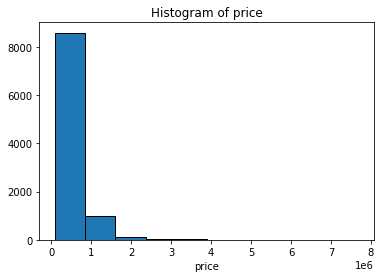

In [235]:
data.hist(column="price", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('price')
plt.title('Histogram of price')

plt.show()

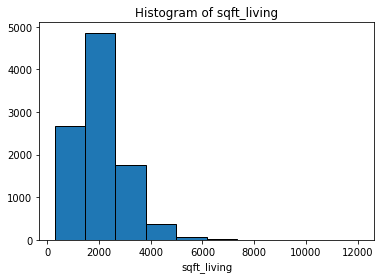

In [236]:
data.hist(column="sqft_living", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('sqft_living')
plt.title('Histogram of sqft_living')

plt.show()

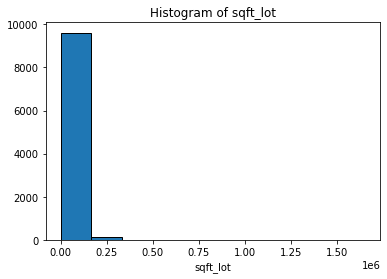

In [237]:
data.hist(column="sqft_lot", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('sqft_lot')
plt.title('Histogram of sqft_lot')

plt.show()

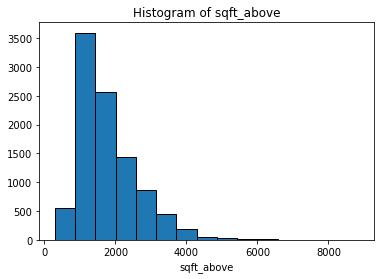

In [238]:
data.hist(column="sqft_above", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_above')
plt.title('Histogram of sqft_above')

plt.show()

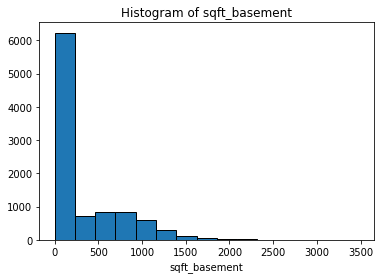

In [239]:
data.hist(column="sqft_basement", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_basement')
plt.title('Histogram of sqft_basement')

plt.show()

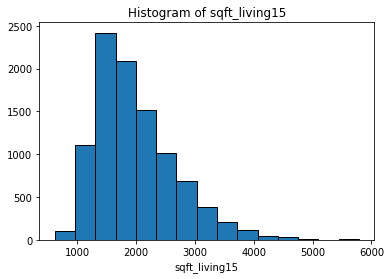

In [240]:
data.hist(column="sqft_living15", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_living15')
plt.title('Histogram of sqft_living15')

plt.show()

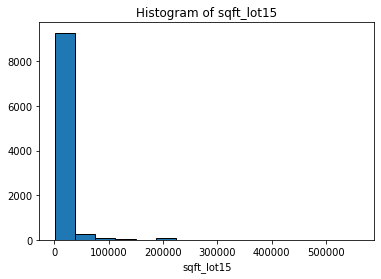

In [241]:
data.hist(column="sqft_lot15", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_lot15')
plt.title('Histogram of sqft_lot15')

plt.show()

### UNIVARIATE SUMMARY

9761 houses were sold in King County between the year 2014-15. Majority of the houses sold were not waterfront properties and had an adequate view. The average price of a house was  $542,735 with a large  variability in prices.  The median price was less  than  the mean price which indicated a right skew of price distribution. In other words, most of the house prices lay on the lower end of the prices spectrum. On an avg, houses sold had 2 bathrooms, 1-1.5 floors (indicating presence of attic  space), a grade of 7.5 on a scale of 1-13 and a living area of 2100 sq ft. Most houses didn't have basements.

75% of the houses had a living area less than 2570 sq ft, but alarmingly, the remaining 25% of the houses had a living  area between a wide range of 2570-12050 sq ft. There were many anomalies in the characteristics of the houses, which indicated either incorrect data collection or presence of outliers that were skewing the information we were seeing. The average lot size for houses was about  15000 sq ft, the minimum being 520 sq ft. 75% of the houses had a lot size of  less than 10.5k sq ft. Due to the pressence of  outliers, the mean here was being pulled up to a higher number. According  to the latest data collection in  2015, the avg lot size of the houses sold decreased from 2100  ssq ft to  1992 sqft for all quartiles. The oldest house was built in 1900 whereas the most recent house was built in 2014. 


#### SCOPE: QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS
1. Which pincode(lat/long) has the highest/lowest price?
2. Given that the number of bedroooms is 3 (avg)/lot size is 7642 sq ft(avg)/floors  is 1.5 (individually), what are the different house prices?
3. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes
4. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
5. How are grades  determined? (linear regression can be done  on grades  too) What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
6. What to do with  outliers?
7. Mapping lat/long to check if houses are in vicinity? What are the amenities nearby - schools, libraries, grocery stores, malls, etc.?
8. Check for  multicollinearity: condition, renovation; sqftliving:bedrooms
9. Check for Correlation: a. Basements and prices as basement usually has many amenitiess, home theatre,etc., 10. yr.built, zipcode, prices (some areas have more  heritage homes) relationship


###  Experiment:  Bivariate Analysis

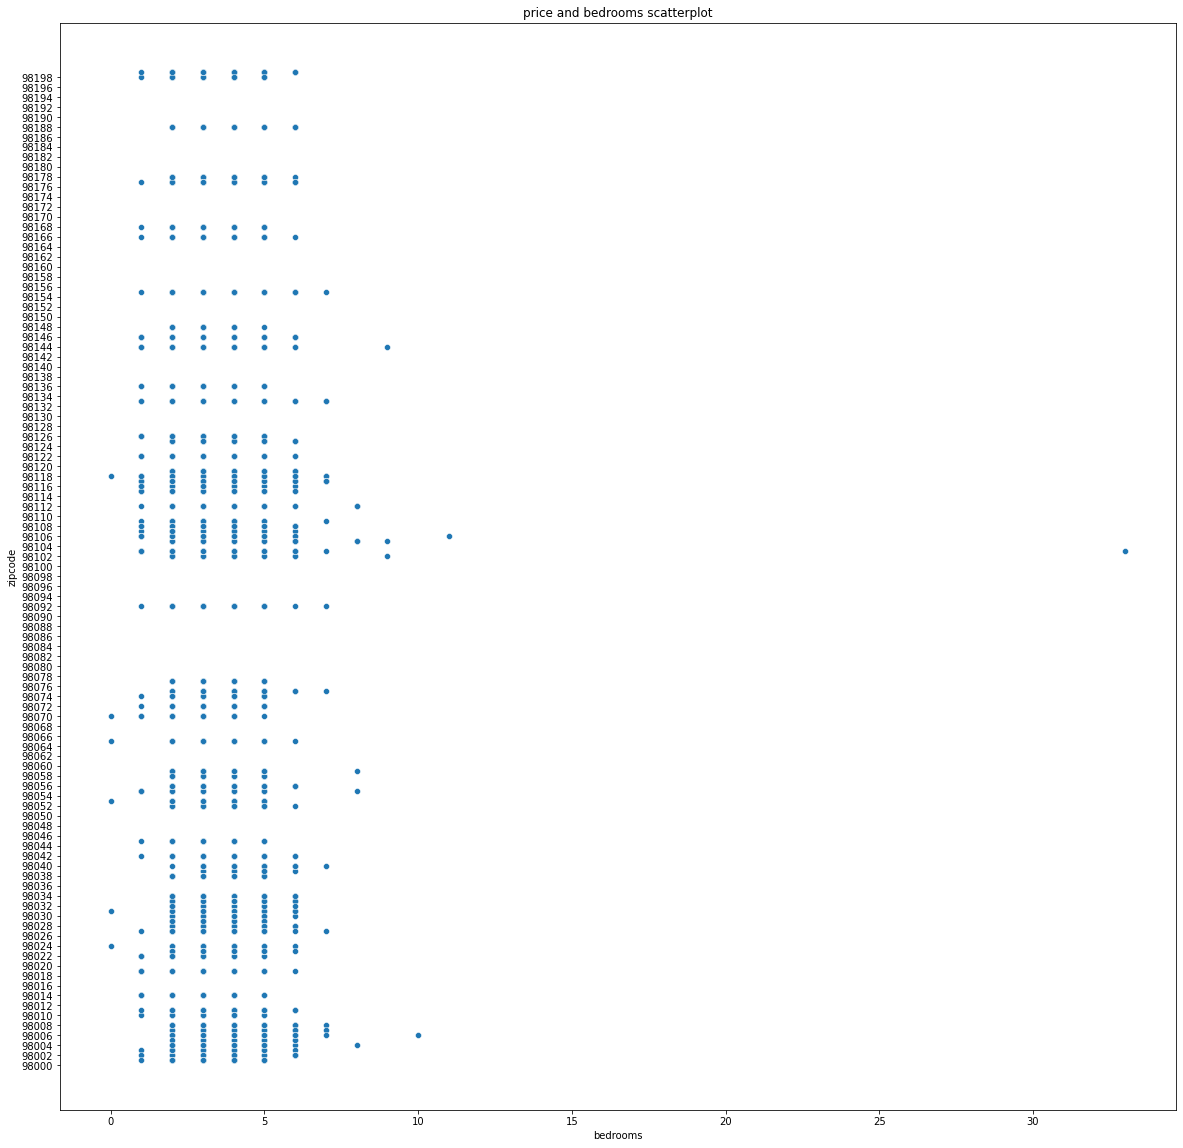

In [242]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='bedrooms', y='zipcode' , data=data,)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and bedrooms scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

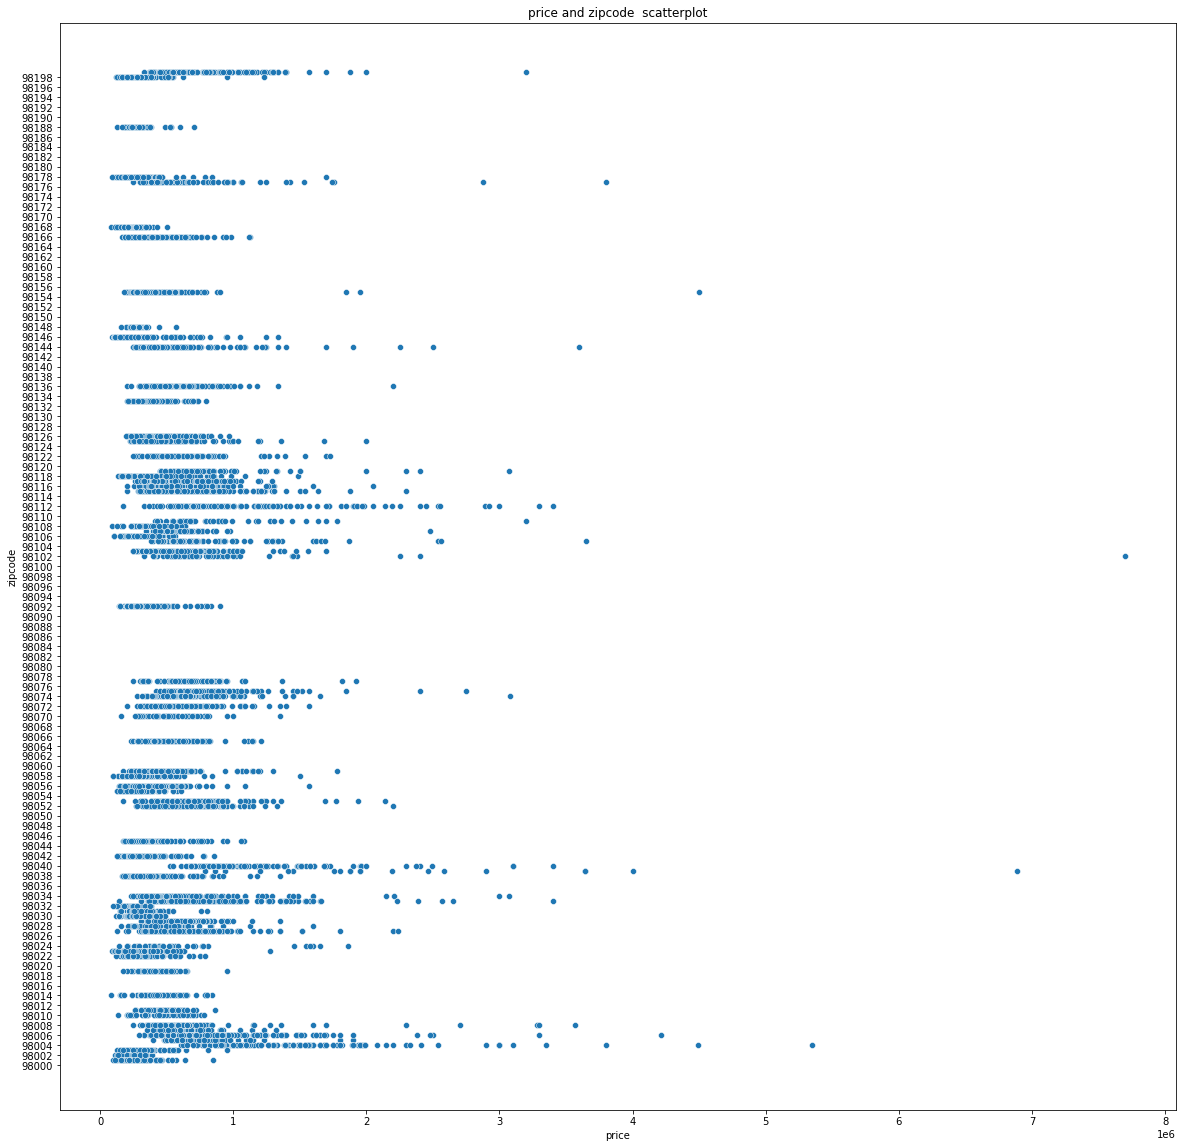

In [243]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='zipcode' , data=data,)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and zipcode  scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

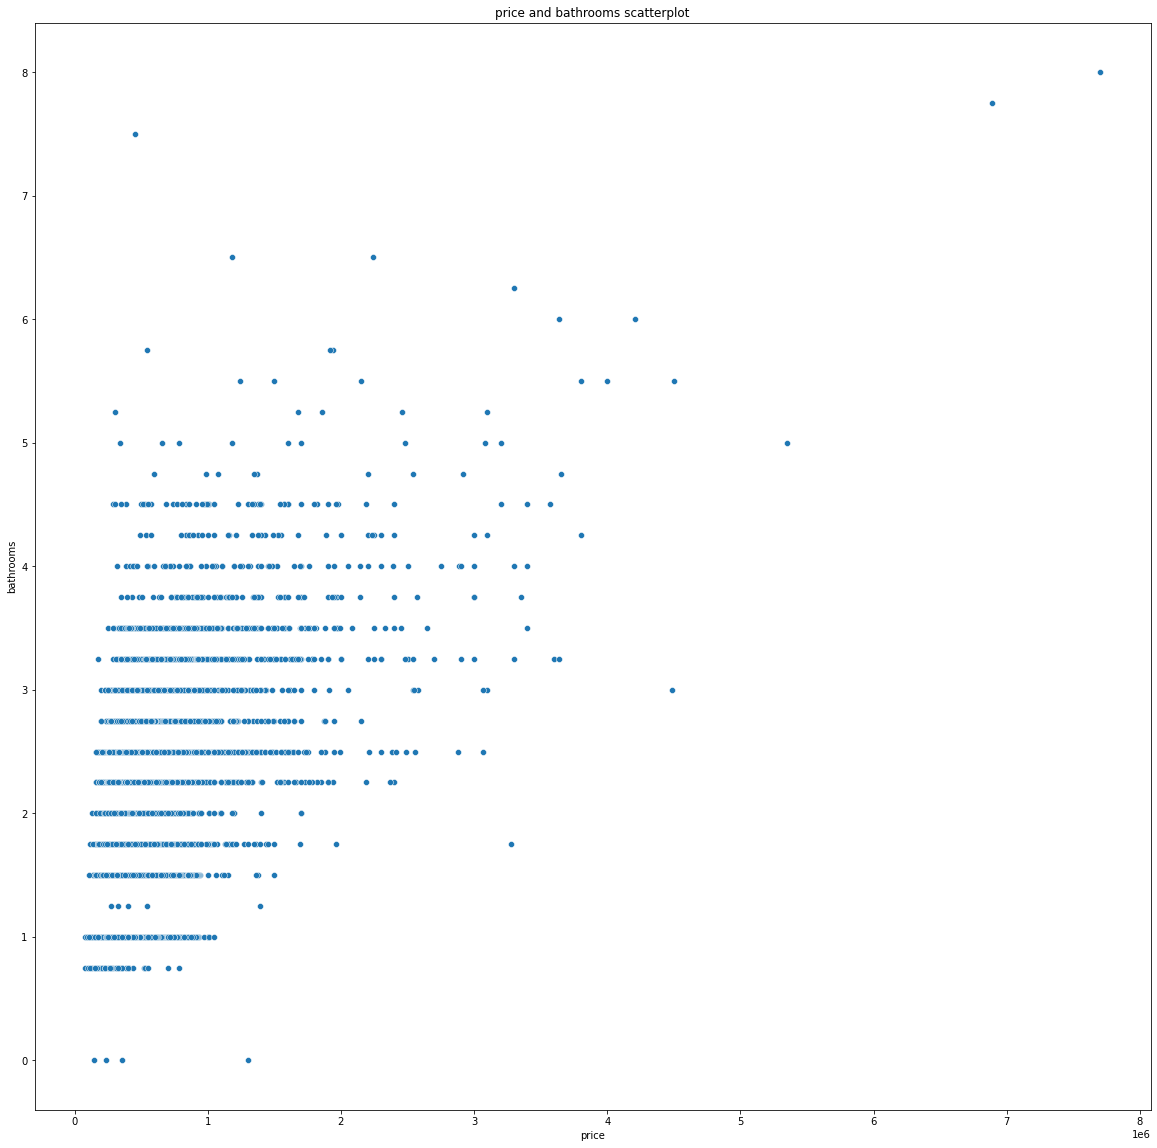

In [244]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='bathrooms', data=data,)
plt.title('price and bathrooms scatterplot')
plt.show()

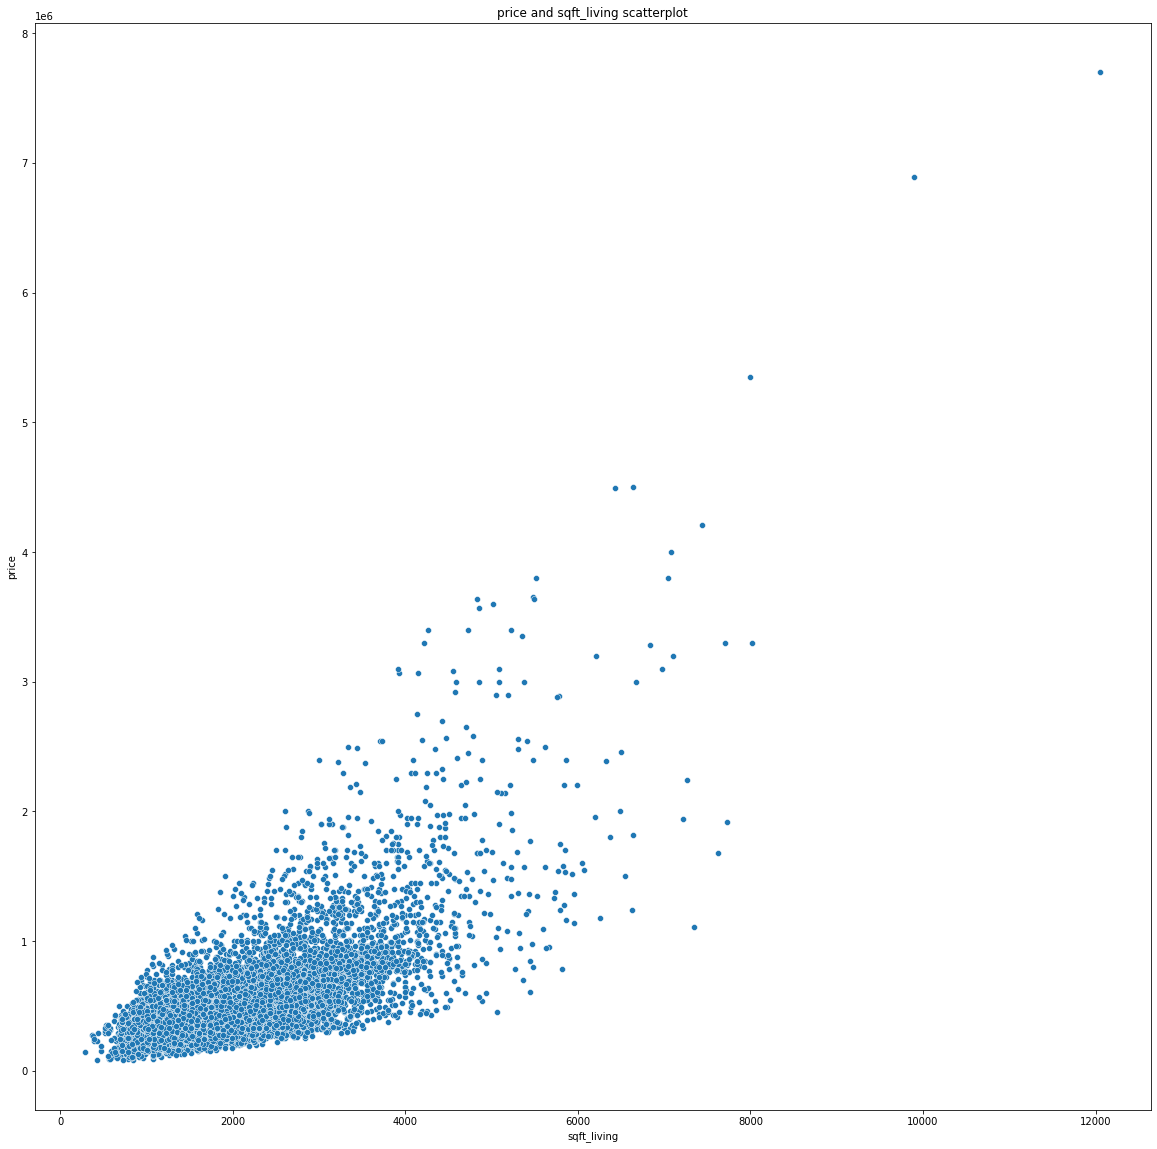

In [245]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='sqft_living' , data=data)
plt.title('price and sqft_living scatterplot')
plt.show()

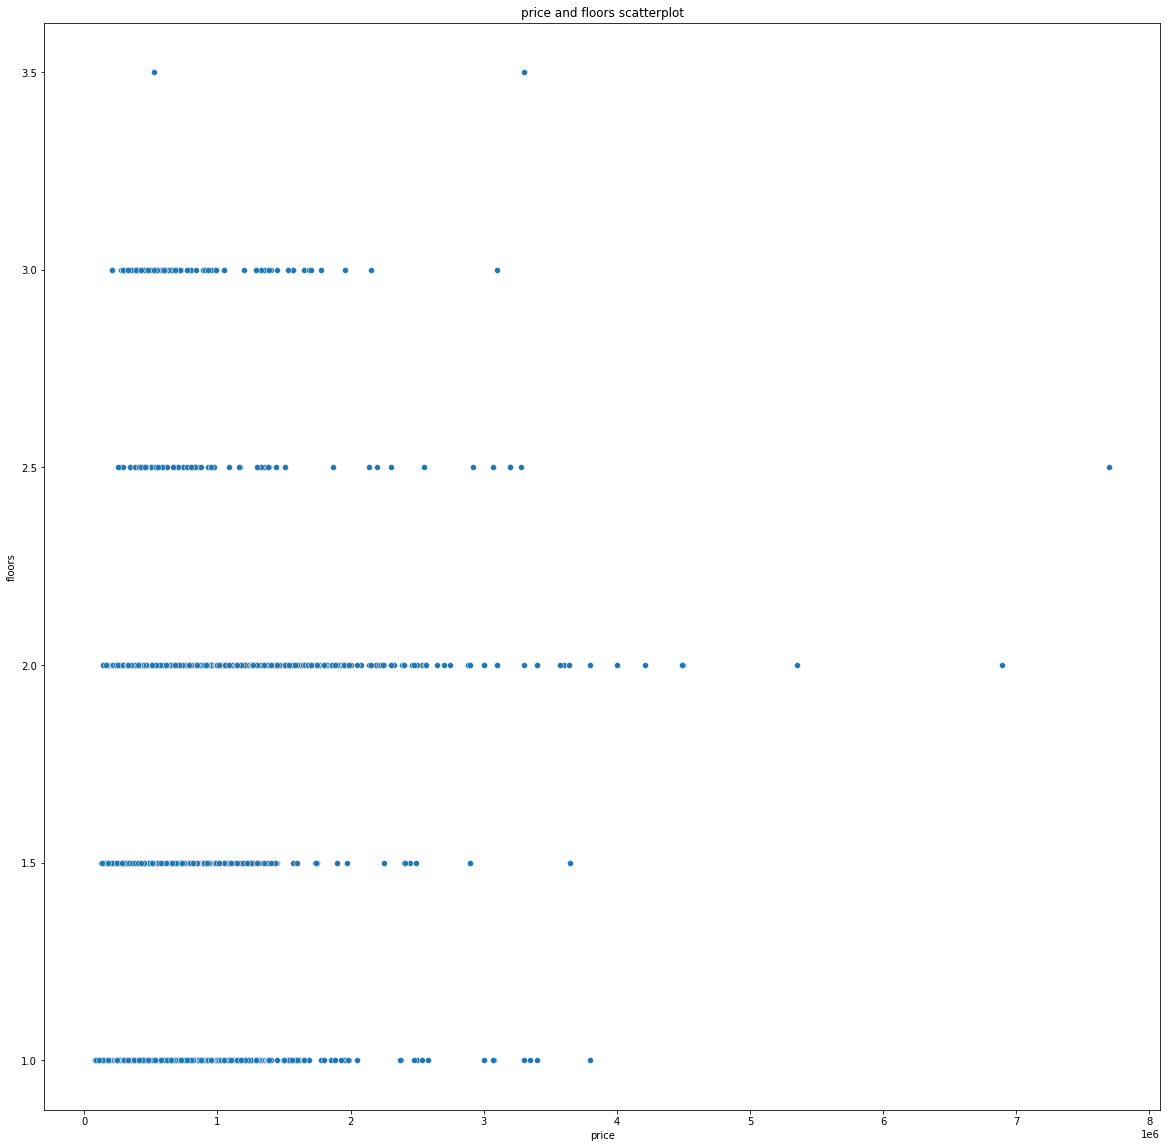

In [246]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='floors' , data=data,)
plt.title('price and floors scatterplot')
plt.show()

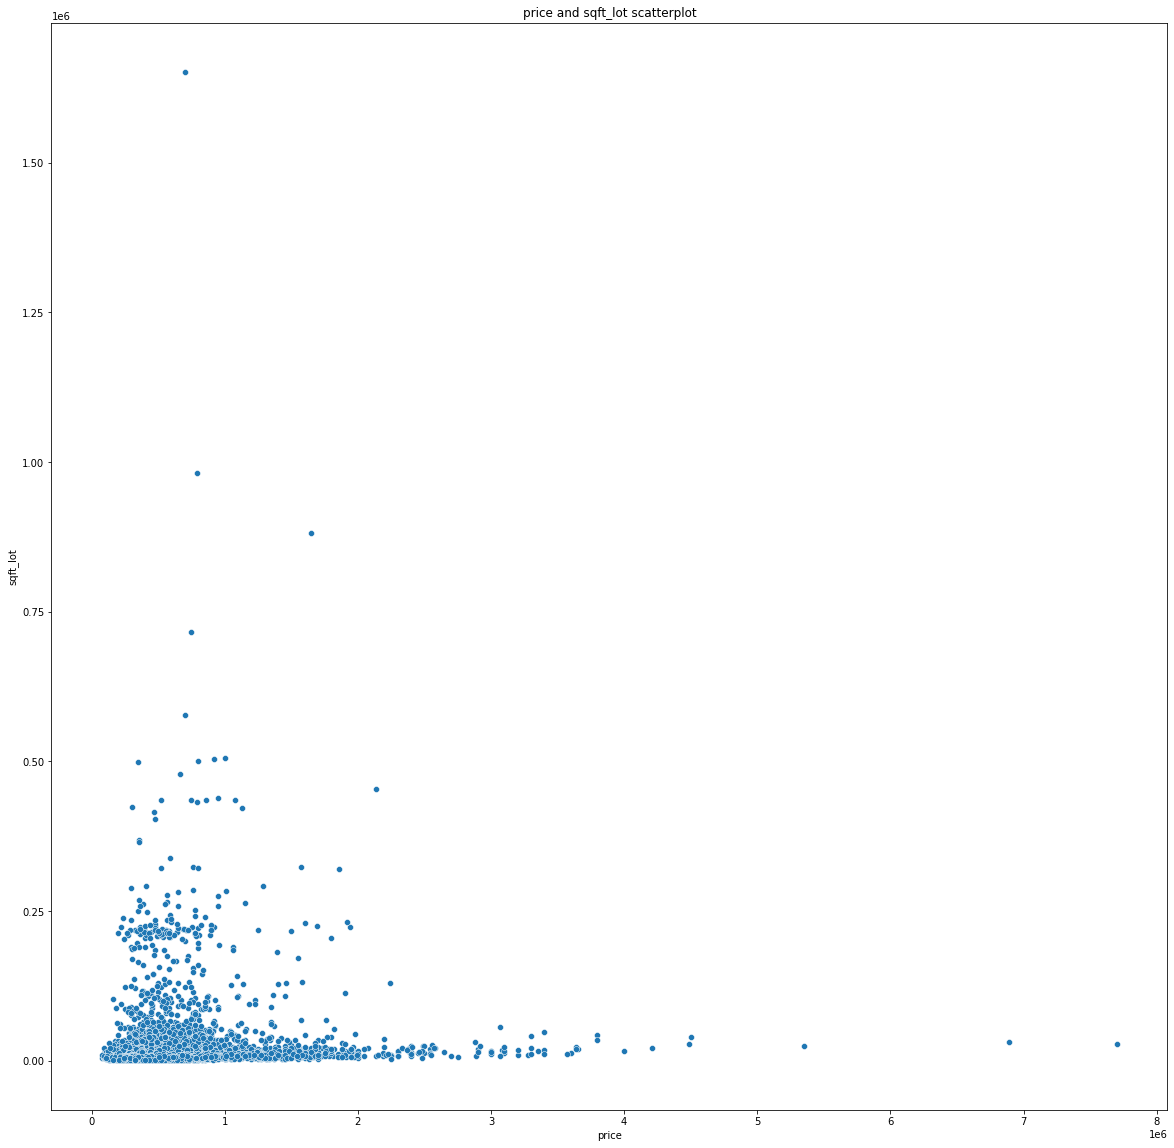

In [247]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='sqft_lot', data=data,)
plt.title('price and sqft_lot scatterplot')
plt.show()

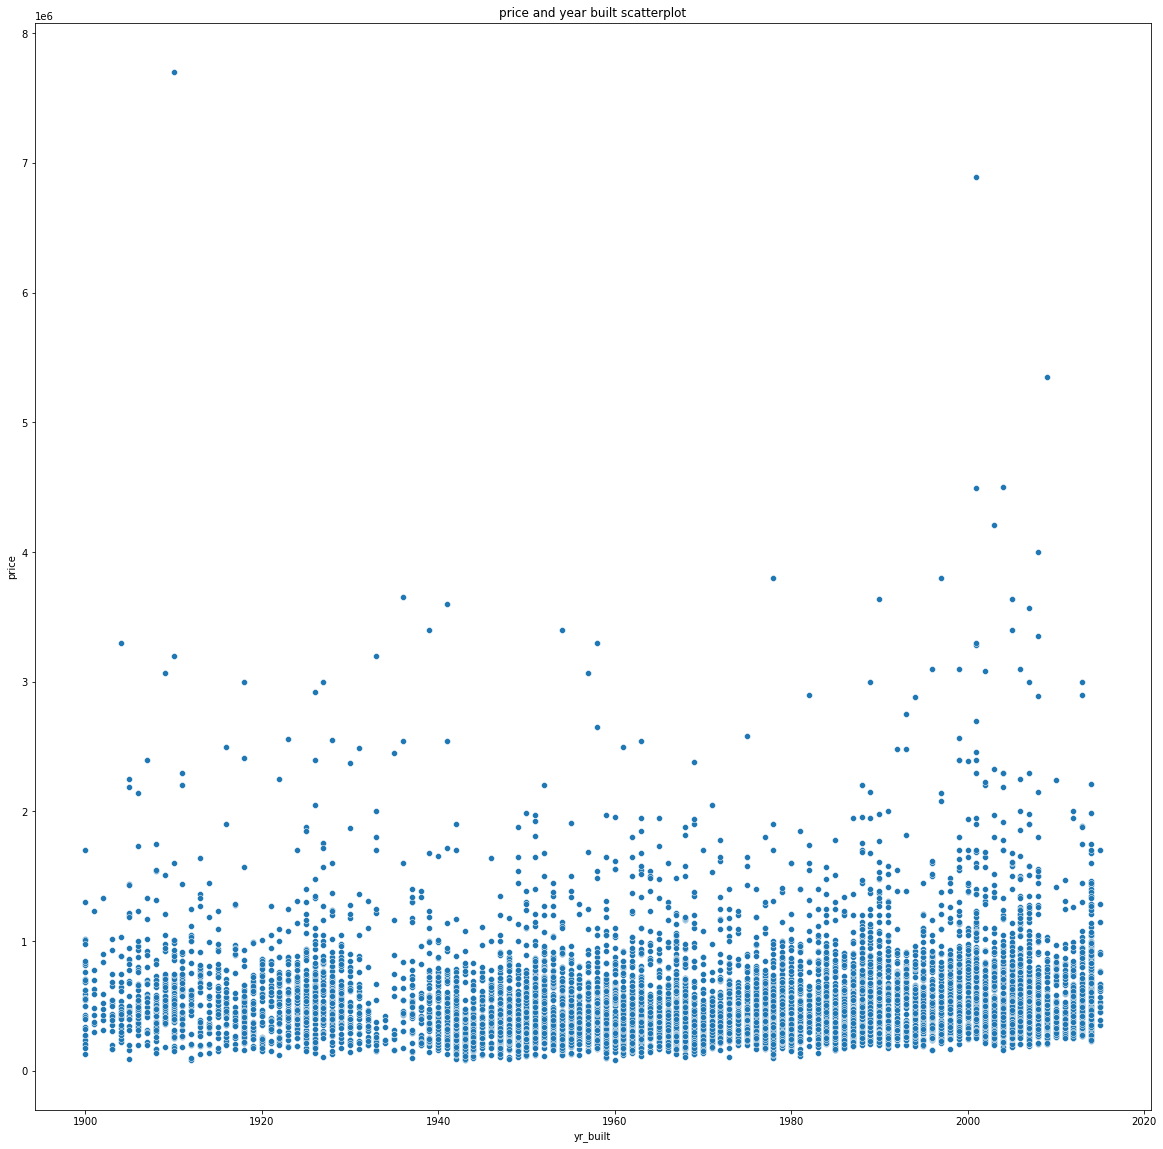

In [248]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='yr_built',data=data,)
plt.title('price and year built scatterplot')
plt.show()

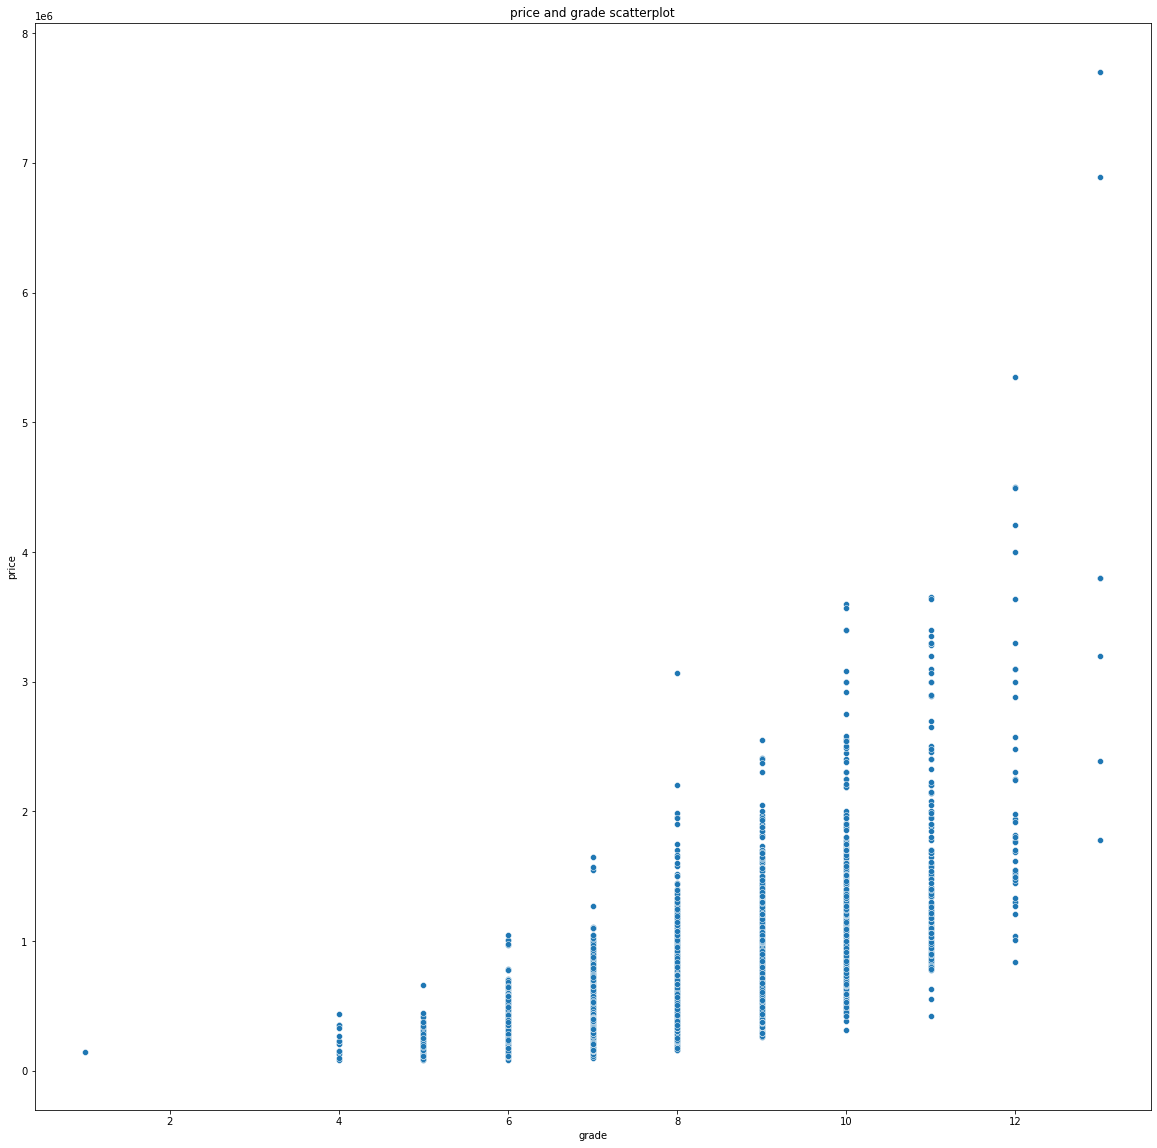

In [249]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='grade' , data=data)
plt.title('price and grade scatterplot')
plt.show()

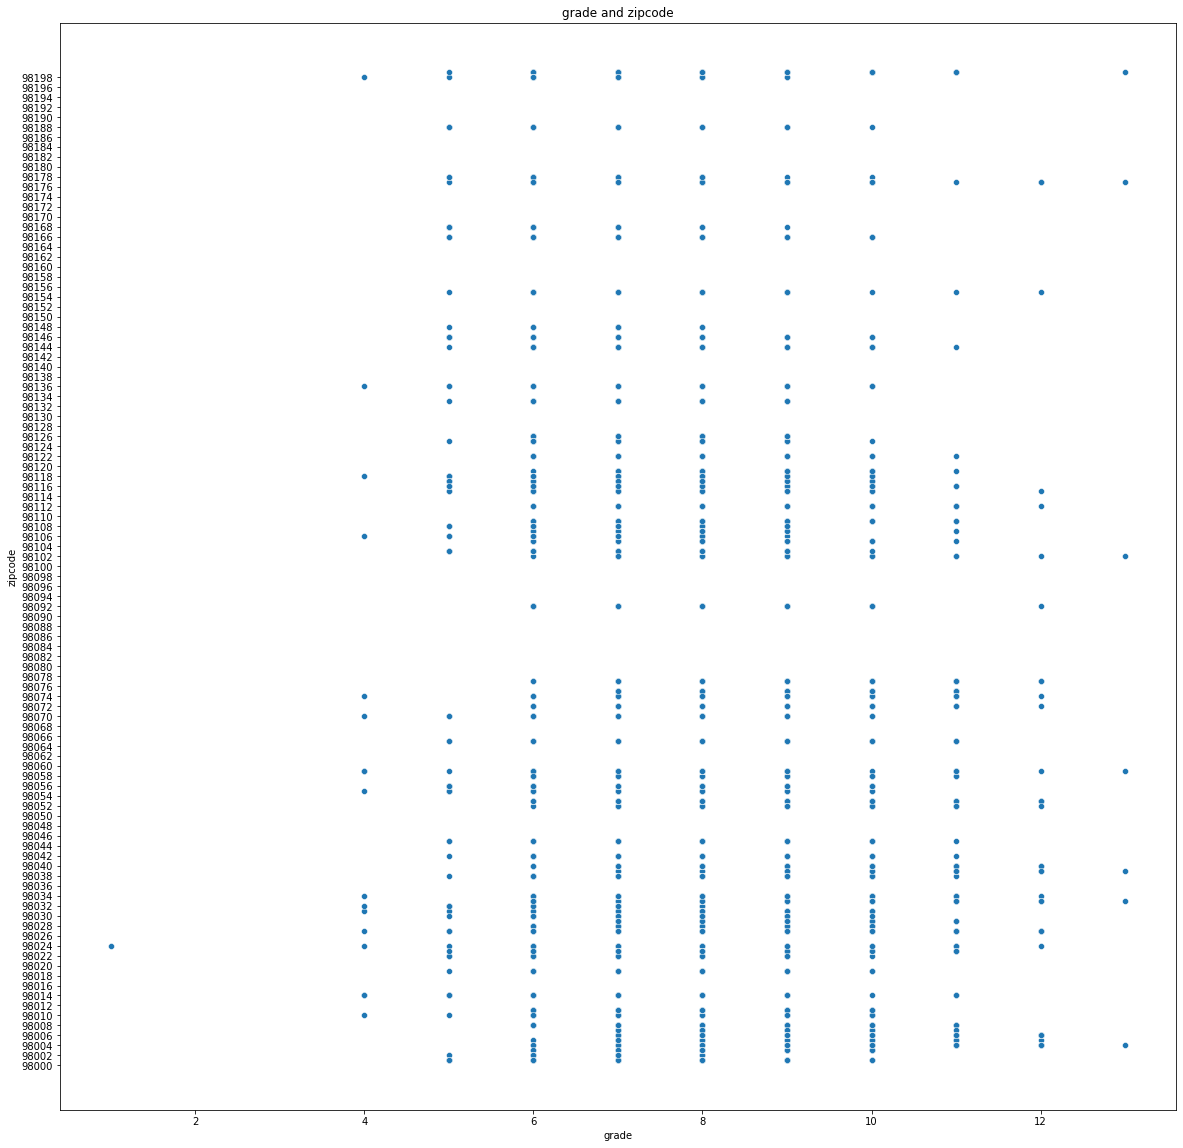

In [250]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='zipcode',x='grade' , data=data)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('grade and zipcode')
plt.show()

In [3]:
#creating a new variable "house_age" 
house_age= 2015 - data['yr_built']

In [4]:
data.insert(21, 'house_age', house_age, True)

In [5]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
price,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.299191,0.023718,0.584829,0.077960,-0.051737
bedrooms,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149,-0.155102
bathrooms,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722,-0.499589
sqft_living,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545,-0.322723
sqft_lot,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922,-0.054043
floors,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269,-0.481926
waterfront,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499,0.027010
view,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904,0.056361
condition,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253,0.357396
grade,0.665594,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.107977,0.201114,0.717835,0.118618,-0.447817


<AxesSubplot:>

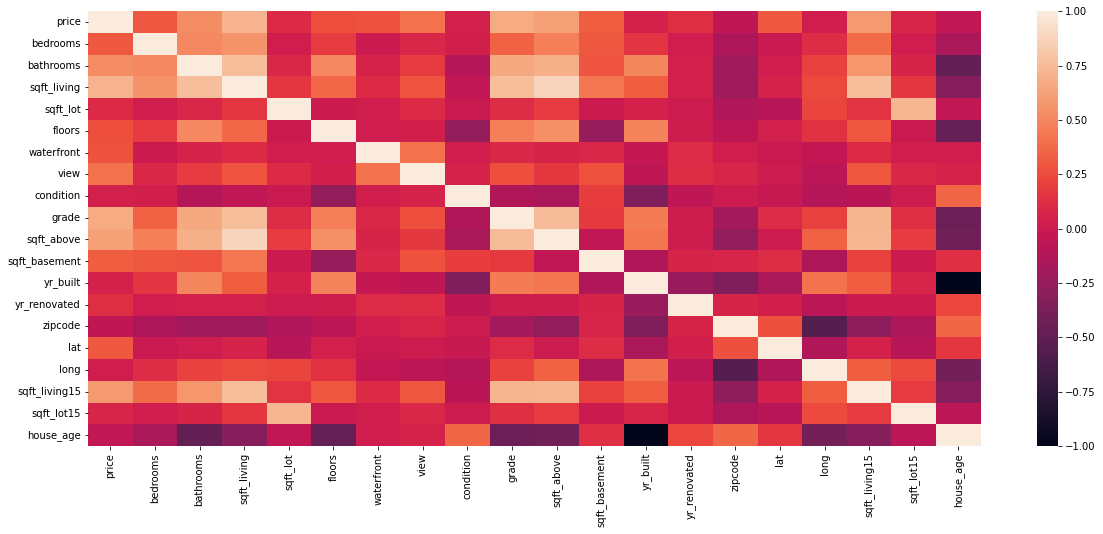

In [6]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr())

### BIVARIATE SUMMARY 
**ANSWERS TO QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS:**
1. Which pincode(lat/long) has the highest/lowest price?

Certain pincodes are associated with higher price range whereas some are associated with lower prices. The latter  category has lower variability and more consistent observations, whereas zipcodes with highly priced houses have houses in the lower or mid range as well. 

2. Do prices increase as number of rooms/bathrooms increases? Given that the number of bedroooms is 3 (avg), what are the different house prices?
Surprsingly, no. We notice that these two  variables have a low (linear) correlation of 0.30. Additionally, when we plotted a scatterplot for price and beddrooms, we noticed that for given number of bedrooms, there was a large  vavriability in prices. Some  outliers are present with high number of bedrooms but low prices, which is intriguing. 

On the other hand, bathrooms and  prices have a higher correlation of 0.52. Even in our boxplot, we are  able to notice that there is a ladder-like trend, inddicating that as number of bathrooms increase,  the price range also begins to increase. 

3. Given that the living size is 2100 sq ft(avg), what are the different house prices? 
As  hypothesized, there  is a  strong correlation between house prices and sqft living space. This is also visible in the scatterplot where prices seem to increase slowly (flatter slope) as sqft_living increases. There is less variability in prices at 2100 sq ft,  i.e., prices are in the lower range for these houses. 

4.  Correlation between lot size and prices
Contrary to our hypothesis, there is a really low, almost negligible, linear correlation between lot sizes and prices. This is counter-intuitive as our understanding was that  houses  with bigger lot sizes would cover more sqft area and therefore have higher prices. Perhaps this is dependent on other factors such as zipcode. 

5. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes

To assess this, we created a variable called house_age which is the difference betweem 2015 and the year built. Our hypotheses is disproved as older houses aren't associated with higher prices. In fact, a small number of newer, modern houses are associated with higher prices, however, these could just  be outliers.  

6. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
Looking at average prices of renovated houses and non-renovated  houses in Excel, we find that the average price  of renovated  homes is higher (about 650k vs. 500k). We will be categorizing these into dummy variables during feature engineering.

7.  What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
There is a high correlation between grades and prices (0.66). Higher grades are related with higher  prices. We cannot read  the correlation coeffiecient for zipcode and grades,  as the zipcode data is being read as numerical data.

8. Does having a waterfront increase  the price of the home?
Surprisingly,no. There is low correlation between prices and presence of waterfront.  


9. Check for  multicollinearity: condition, house_age; sqftliving:bedrooms
a.condition, house_age: low correlation (0.35)
b.sqftliving:bedrooms: moderately correlated (0.56)

10. Check for Correlation: 
a. Basements and prices (as basement usually has many amenitiess, home theatre,etc.): low correlation (0.30)
b. house_age, zipcode: unable to say as zipcode can't be handled numerically


### Experiment: Data Cleaning before Model Fittinng

As observed earlier, we found many outliers across the features, however, we chose to keep the outliers as they were large in number, and hence did not indicate incorrect data collection. However, there were a few observations  that we cleaned up as they had values which did not seem plausible considering its other features. For instance, there was a  house with  33 bedrooms with 1620 sqft  of living space and 6000 sqft  lot space. It had 1.75  bathrooms. Its other features (highlighted below) seem plausible so we decided to correct the bedrooms to 3  (Which is also  the  average number in our dataset).

In [7]:
data[data.bedrooms == 33]                                  #updating bedroom values for outliers/anomalies with average bedrooms
data.loc[[7204],'bedrooms'] = 3        #updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data[data['bedrooms']==0]
data.loc[[8840,8338,2228,3177,4472,4507],'bedrooms'] = 3
data.loc[[8840,3177,4472,4507],'bathrooms'] = 2
data.loc[[8338,2228],'bedrooms']=2         #updating to 2 rooms as the avg bedrooms of houses with 1 and 0.75 bathrooms are 2.63 and 2.02 respectively


### Experiment: Initial Decision Tree Model Fitting Step (without Feature engineering)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from  sklearn import tree

#### Trial Model 1

In [9]:
#We chose these variables because they had highest correlation with house prices 
X_train=data[["sqft_living","grade","bathrooms"]]
y_train=data[["price"]]

In [10]:
# Train-Validate Split

In [11]:
#function test-train split
from sklearn.model_selection import  train_test_split

In [12]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size=0.25)

In [13]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(7320, 2441, 7320, 2441)

In [14]:
# Fitting a Regression tree Model

In [15]:
#Set up model
reg_tree=DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [16]:
y_pred=reg_tree.predict(X_valid)

In [17]:
y_valid=np.array(y_valid)

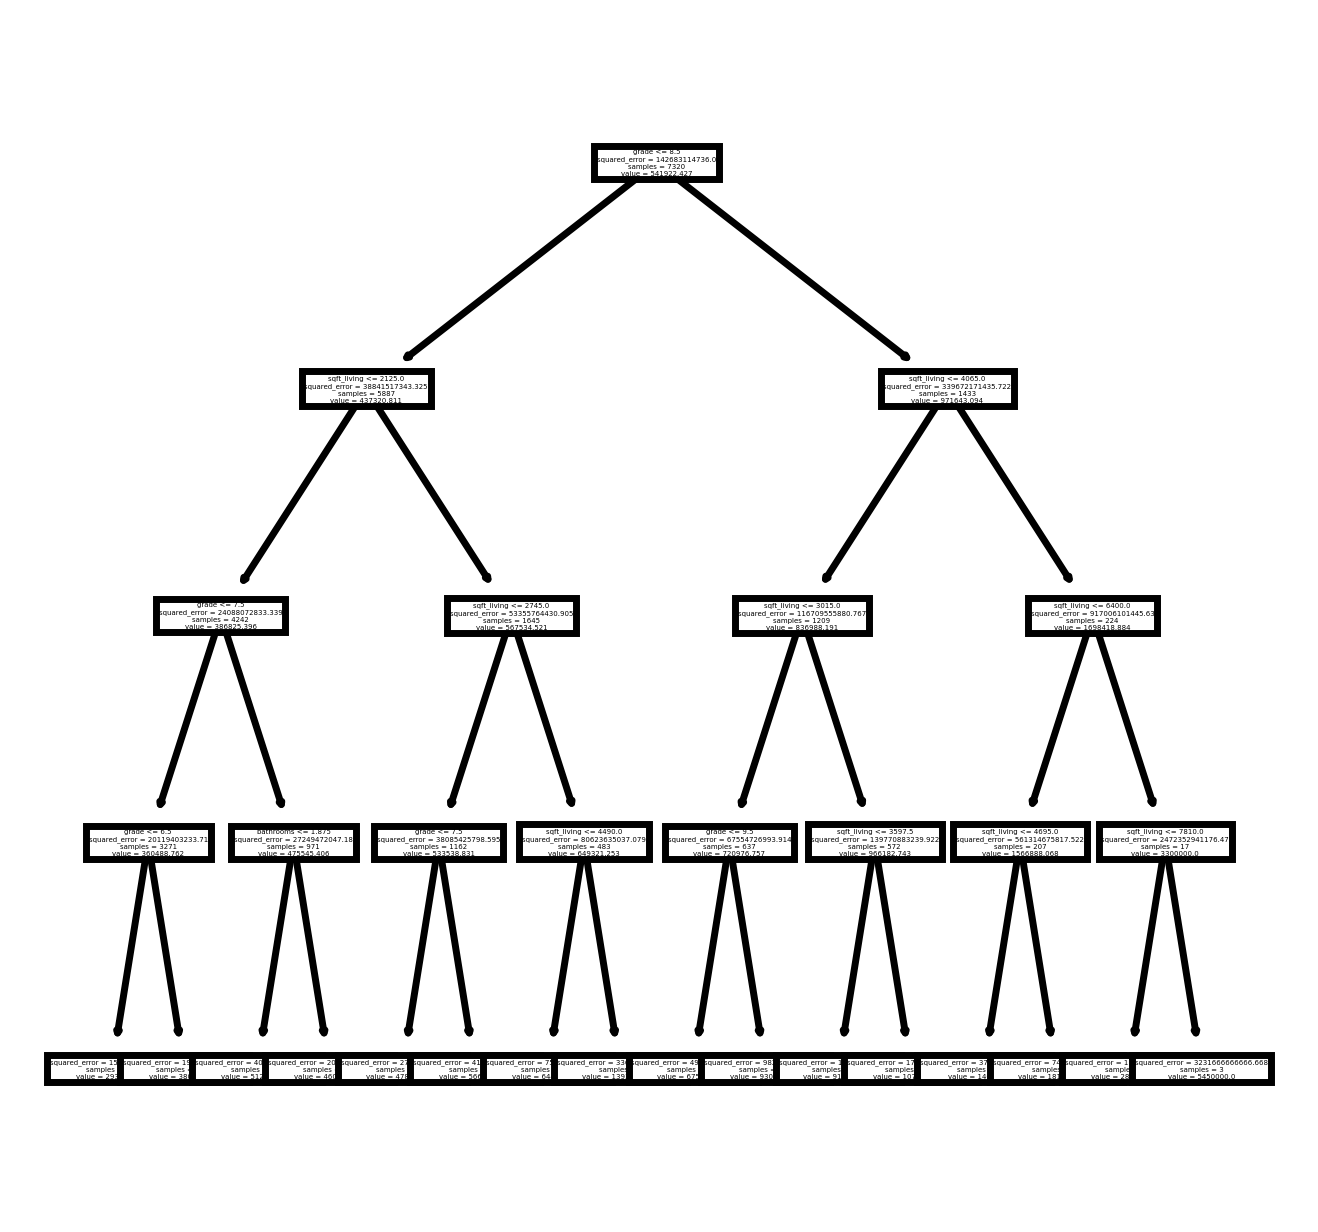

In [18]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model1.jpeg')
plt.show()

In [19]:
# Calculating Error metrics (RMSE, MAPE) and R**2

In [20]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_valid - y_pred)**2))

494763.6370704209

In [21]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

67.09107282489977

#### SCOPE: In this model, we notice that grades, sqft_living are the 2 variables where the first few splits take place. Most of the  stem nodes have  these  variables. The MAPE shows that  on  ann average, the predicted values are away from the actual values by  65%, which is a high  number.  We would like to add 2 new predictors 'sqft_lot','house_age', which we  believe will bring down the error rate. We chose these  variables because we assumed  that  a higher  lot size  would indicate a  higher total sq ft area, thereby increasing the house price. Additionally, although house age doesn't have a linear correlation with price, we believe that older houses will have a lower prices and vice versa. 

### Experiment: Second Trial  (following the  same steps for all  consecutive  trials)


In [22]:
# Setting Predictors and Target Variable for Trial 2

X_train = data[[ 'sqft_living', 'grade', 'bathrooms','sqft_lot', 'house_age'] ]
y_train= data.price

In [23]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [24]:
len(X_train), len(X_valid)

(7320, 2441)

In [25]:
# Fitting a Regression tree Model

reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

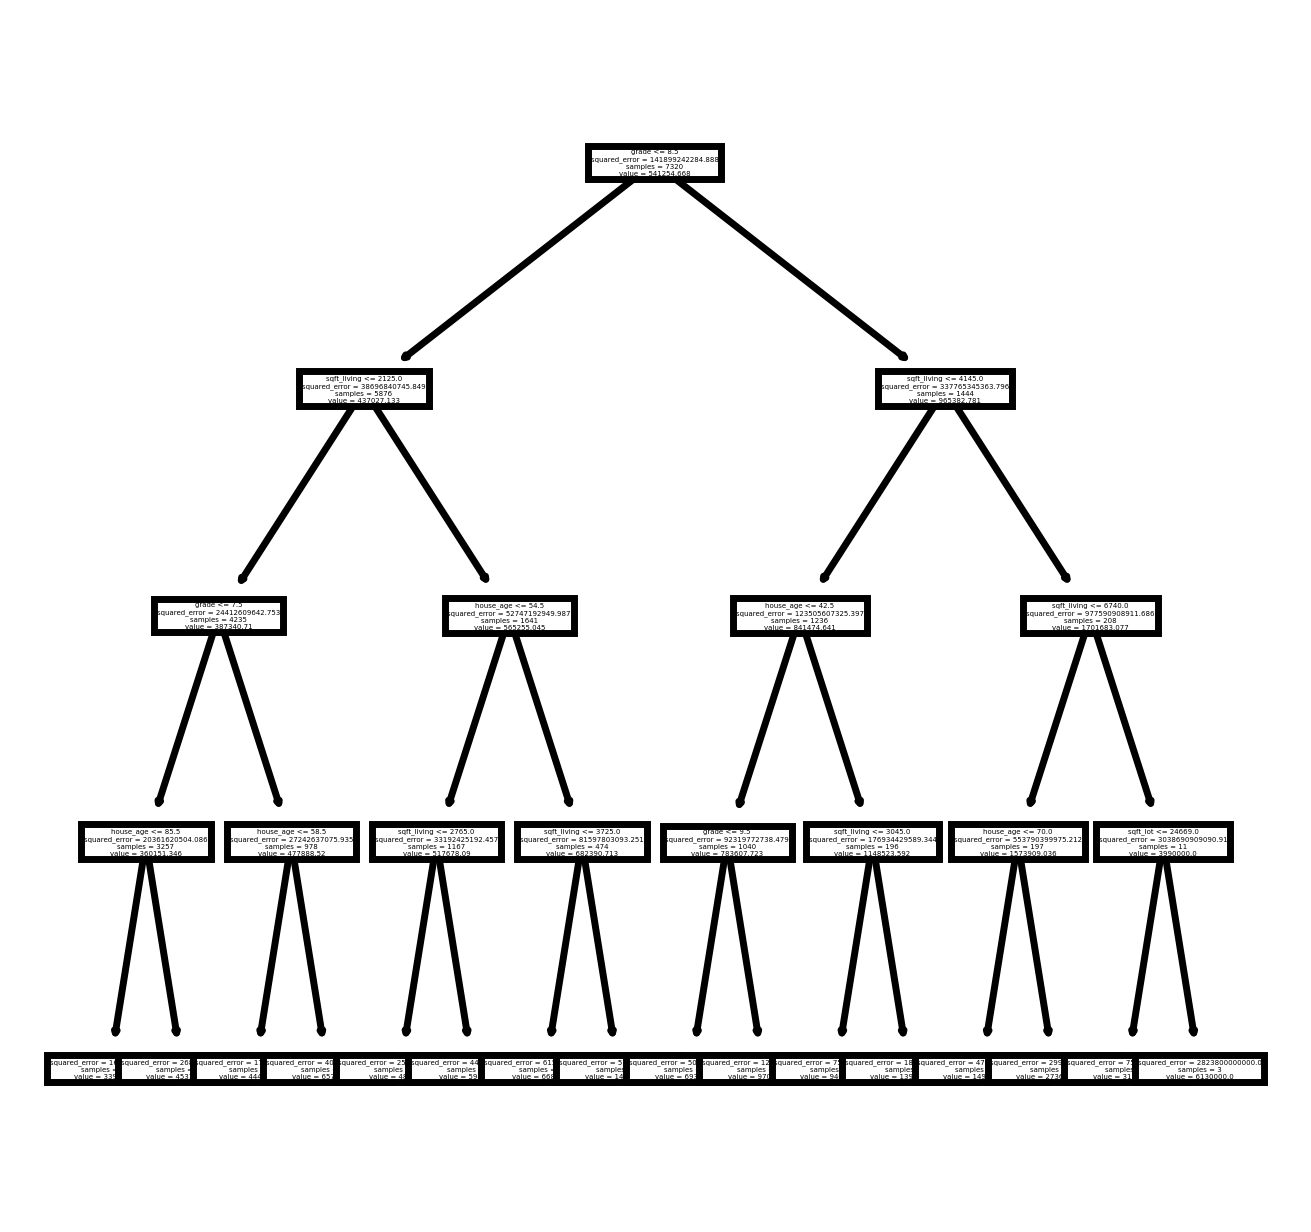

In [26]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model2.jpeg')
plt.show()

In [27]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 339786.69086826, 1498486.91891892,  453167.34358974, ...,
       1498486.91891892,  339786.69086826,  693331.2767475 ])

In [28]:
y_valid=np.array(y_valid)

In [29]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))


298427.7049219091

In [30]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

31.478935876953866

#### SCOPE: In this model, we notice a  drastic change in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see that bathrooms is not considered for splits and it has been  pushed  out of the tree altogether. We can say that the variable  "bathrooms" is not as important for  determining prices. We wanted to check the variable 'bedrooms' because there  was no collinearity between bedrooms and house prices (stated in univariate analysis). 

### Experiment: Third Trial 

In [31]:
# Setting Predictors and Target Variable for Trial 3

X_train = data[['sqft_living', 'grade','bathrooms', 'sqft_lot','house_age','bedrooms'] ]
y_train = data.price

In [32]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [33]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [34]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 339786.69086826, 1498486.91891892,  453167.34358974, ...,
       1498486.91891892,  339786.69086826,  693331.2767475 ])

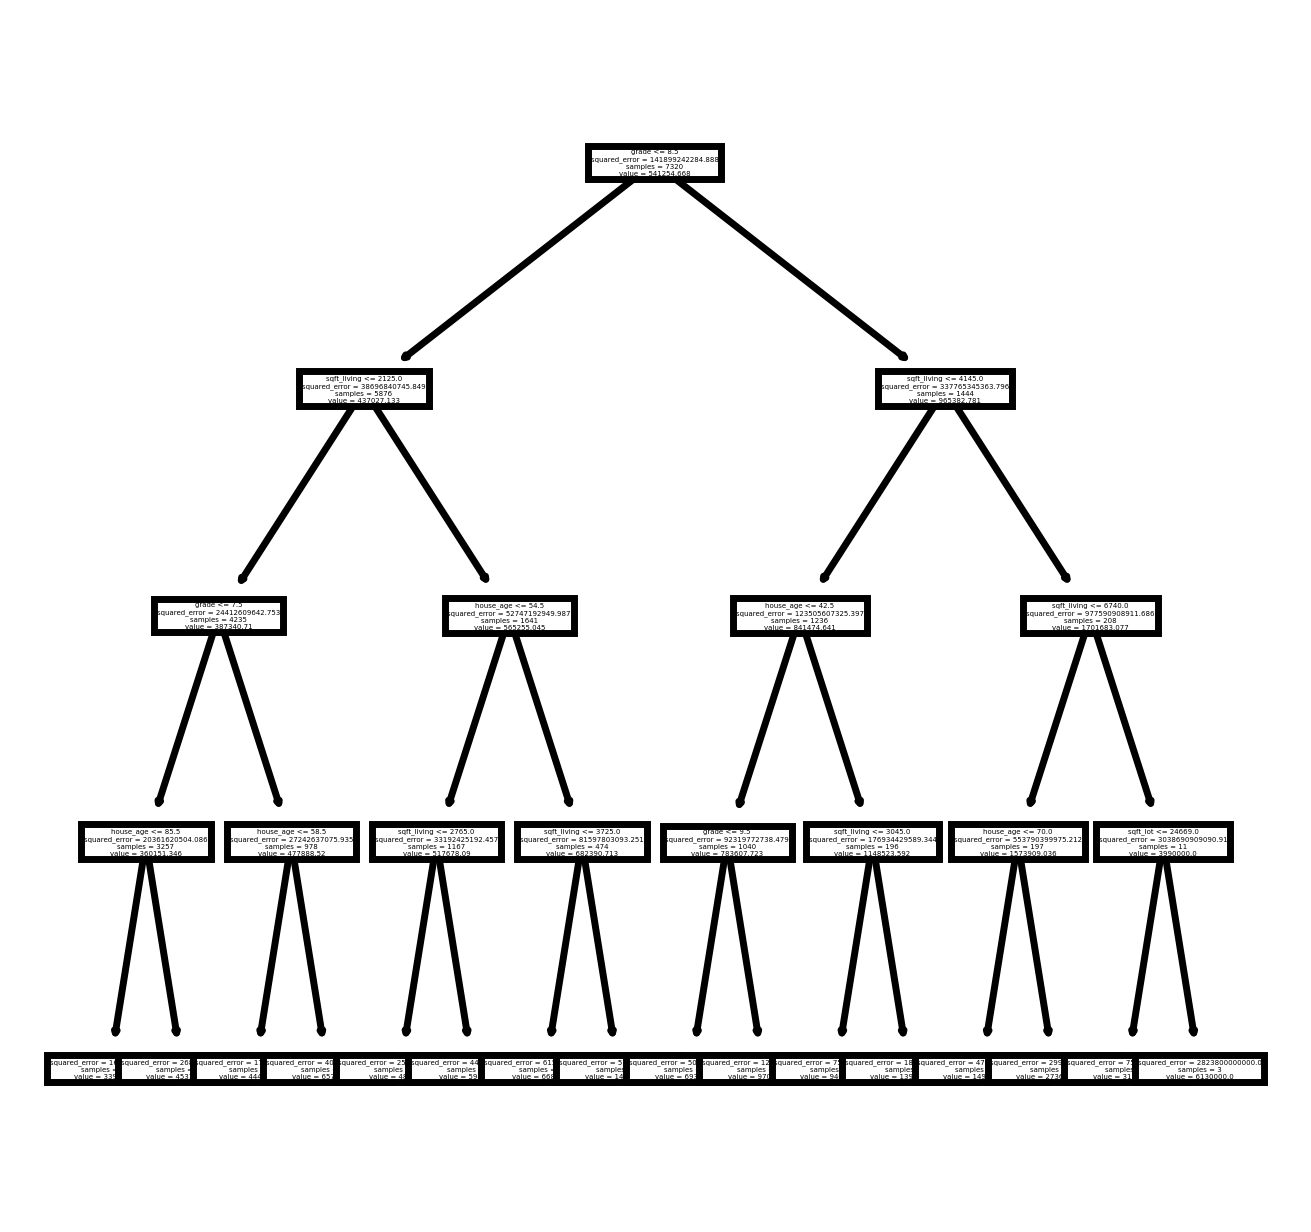

In [35]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model3.jpeg')
plt.show()

In [36]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

298427.7049219091

In [37]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

31.478935876953866

#### SCOPE: In this model, we notice a  negligible change in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see again that only house_age,sqft_living and grade are considered for splits. We wonder about the relevance of the additional variables added to the model. We want to now  add 'condition' and 'floors' variables to the model because our intuition is that a potential housebuyer would pay more for a house with additional floors (and living space) as well as a house in  better condition.

### Fourth Trial

In [38]:
# Setting Predictors and Target Variable for Trial 4

X_train = data[['sqft_living', 'grade','sqft_lot','bedrooms','bathrooms','condition','floors'] ]
y_train = data.price

In [39]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [40]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [41]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 380576.98880895, 1160248.86363636,  380576.98880895, ...,
       1692870.13071895,  380576.98880895,  936561.27962085])

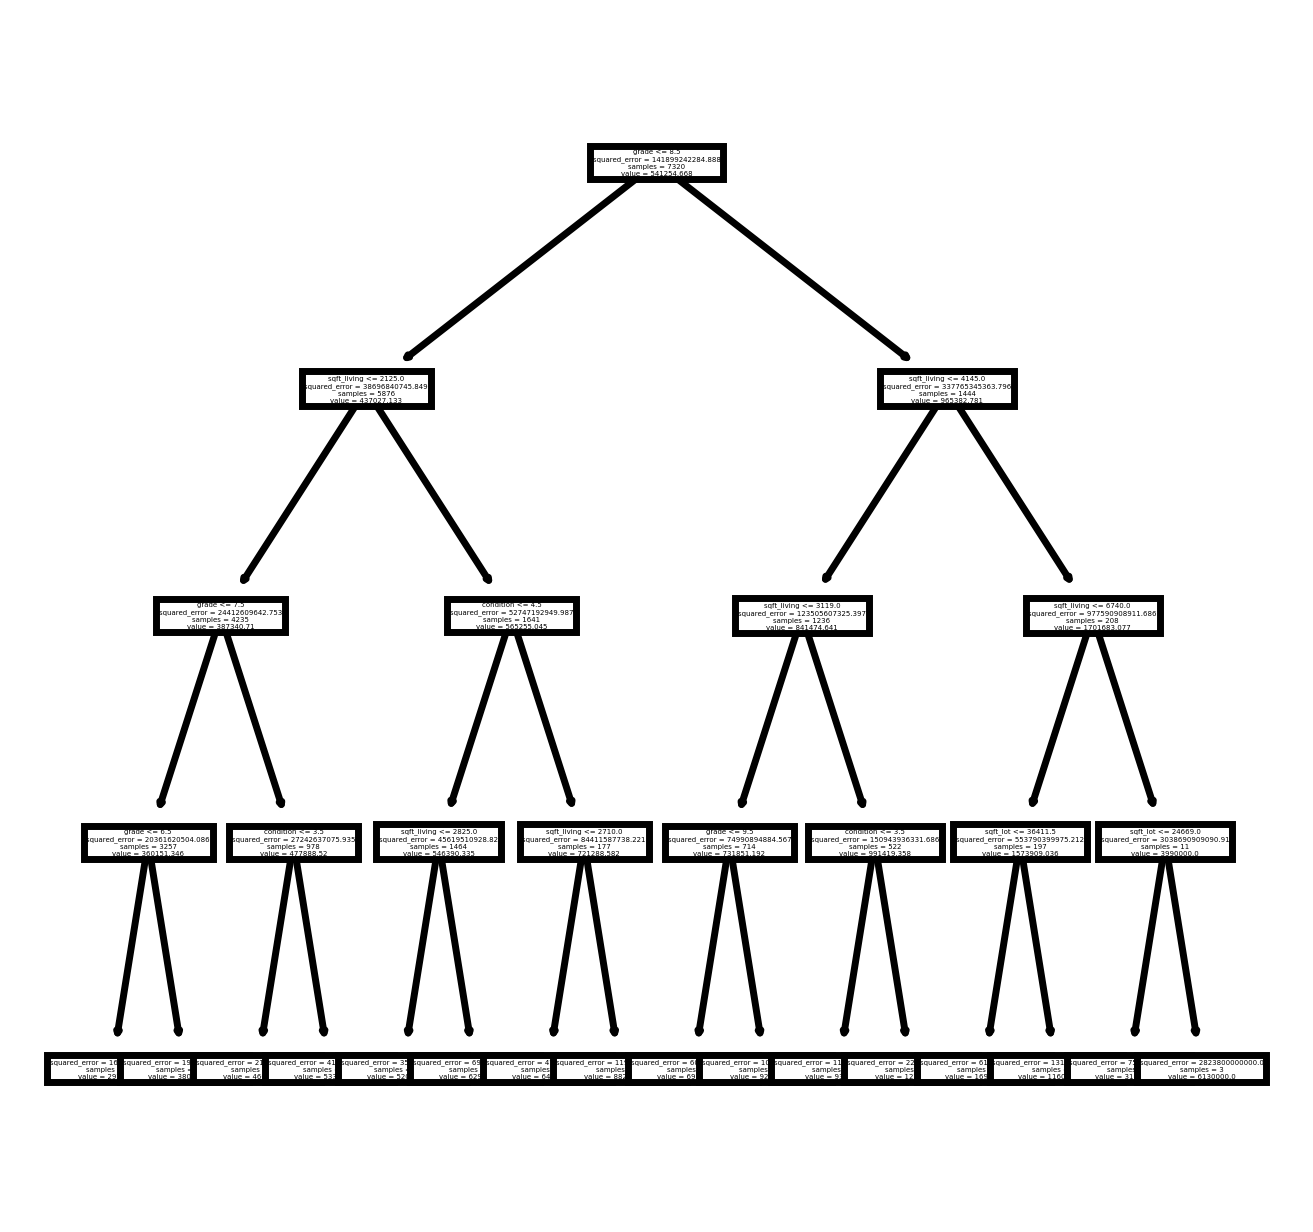

In [42]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model4.jpeg')
plt.show()

In [43]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

311886.7104634829

In [44]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

32.94642192260442

#### SCOPE: In this model, we notice an increase in MAPE. The predicted values are away from the actual values by 32.9%. We notice that the  variable "condition" is being  used for the purpose of splitting, whereas bedrooms and bathrooms continue  to be left out of the decision tree, thereby confirming the irrelevance of  these variables. Presence of  a water  body and having a good view potentially increases the price of house.

### Experiment: Fifth Trial

In [45]:
# Setting Predictors and Target Variable for Trial 5
X_train = data[['sqft_living', 'house_age', 'grade', 'floors','sqft_lot','condition','waterfront','view'] ]
y_train = data.price

In [46]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [47]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [48]:
y_pred = reg_tree.predict(X_valid)
y_pred


array([ 357513.06086142, 3064545.45454545,  515179.58469945, ...,
       1393905.79881657,  357513.06086142,  810377.65384615])

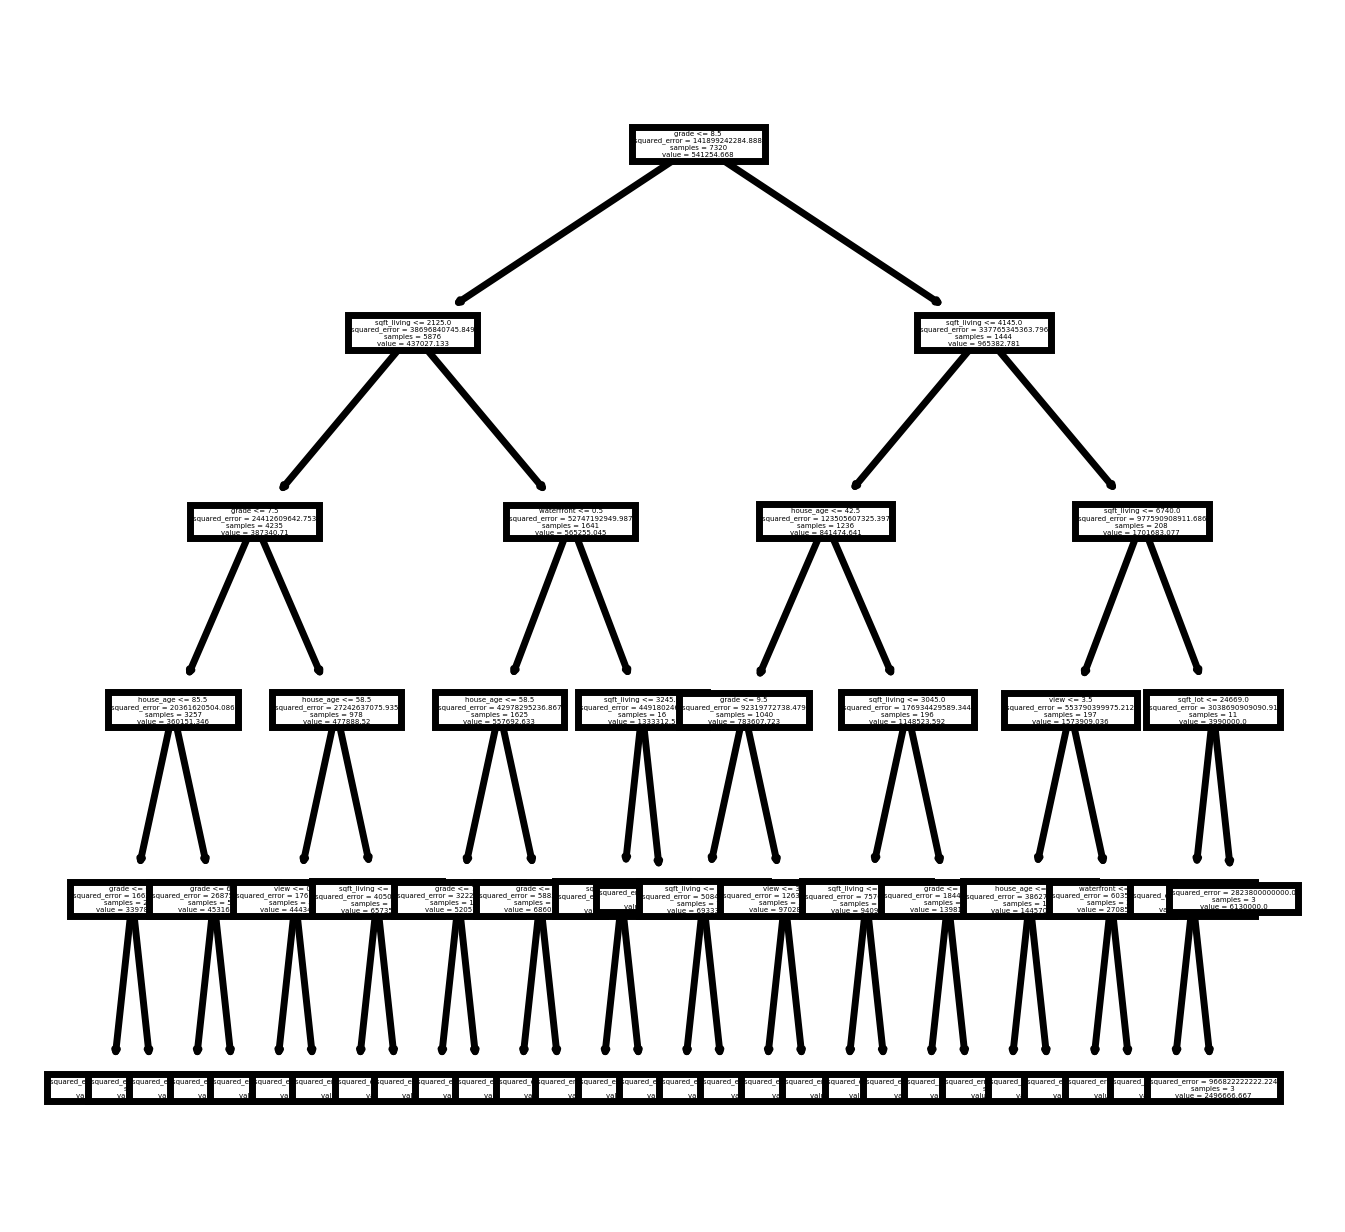

In [49]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model5.jpeg')
plt.show()

In [50]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

281430.81835425604

In [51]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.26174979362149

#### SCOPE: We see a drop in MAPE. Next, we want to remove "sqft_living" and replace it with "sqft_above" to see if it changes the MAPE. We asume that sqft_above is a proxy for sqft_living as it also represents  the size of the living space. 

### Sixth Trial

In [52]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot','house_age'] ]
y_train = data.price

In [53]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [54]:
len(X_train),len(X_valid)

(7320, 2441)

In [55]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

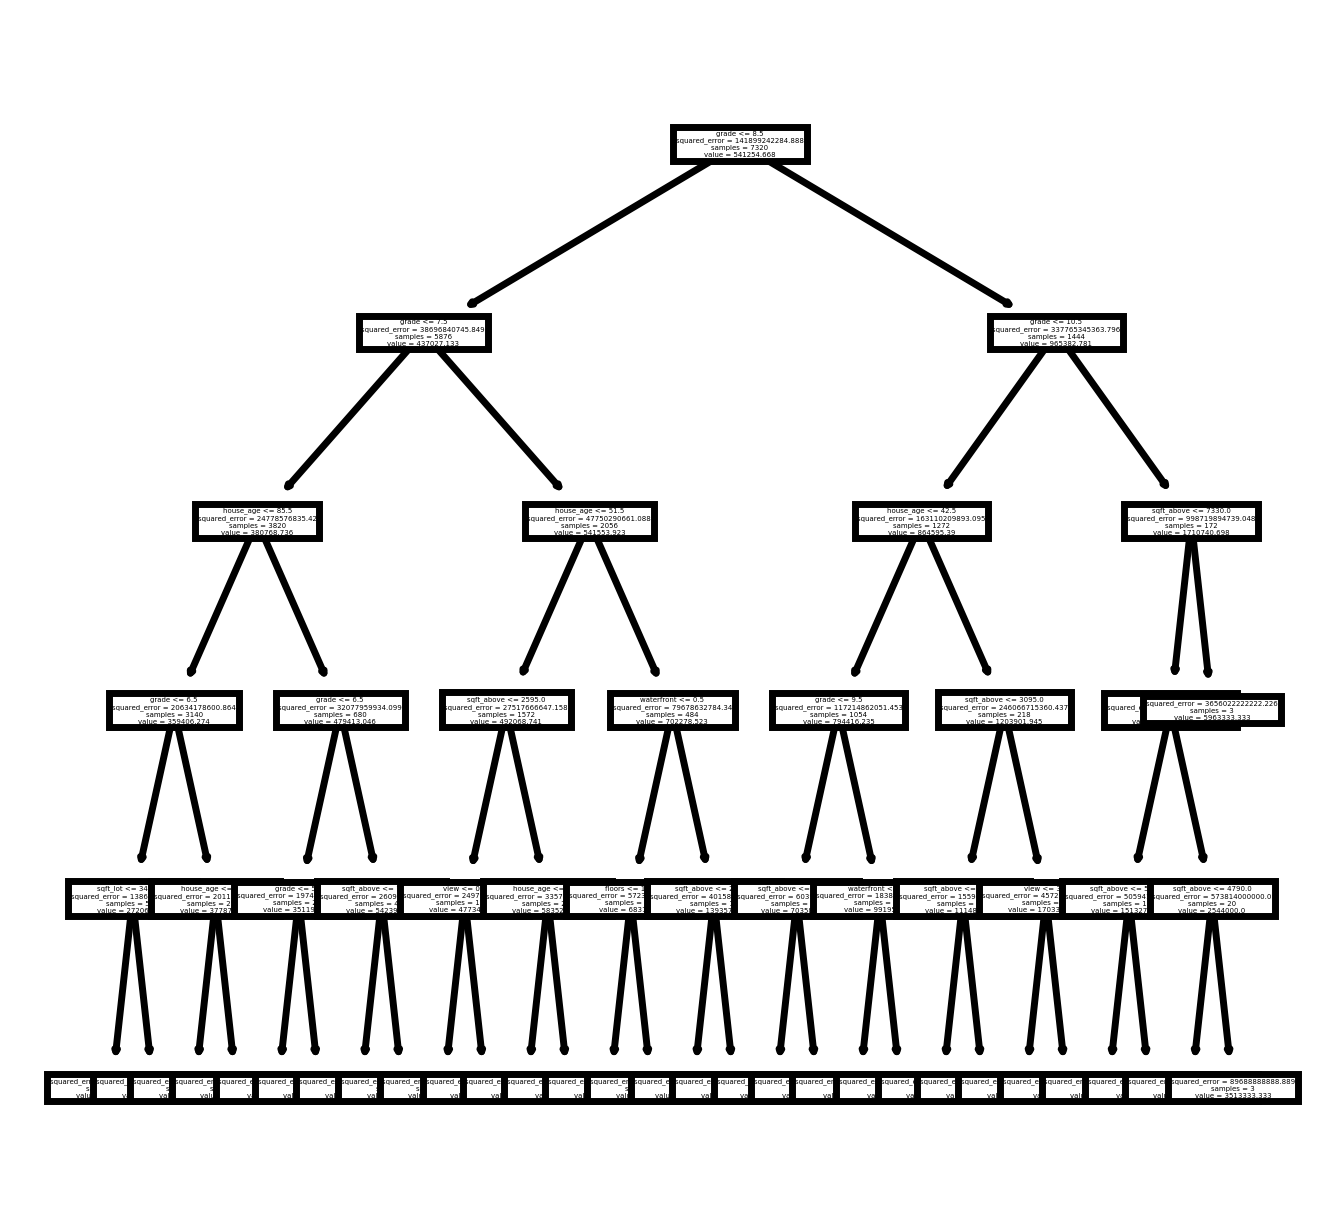

In [56]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model6.jpeg')
plt.show()

In [57]:
y_pred = reg_tree.predict(X_valid)
y_pred


array([ 358408.38762687, 2372941.17647059,  502926.14527027, ...,
        955211.32608696,  454871.71128107,  695795.06302521])

In [58]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

234604.25947474816

In [59]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.007644318998654

#### SCOPE: We see a drop in MAPE. Next, we want to add "sqft_basement" to see if it changes the MAPE. We asume that sqft_basement, in addition to sqft_living, is a better proxy for sqft_living as it  represents  the 'total' size of the living space. We also added bedrooms to see if it would make any difference, although there is no logical reason for  adding it over and above sqft_living.

### Experiment: Seventh Trial

In [60]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot','sqft_basement','house_age','bedrooms']]
y_train = data.price

In [61]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [62]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

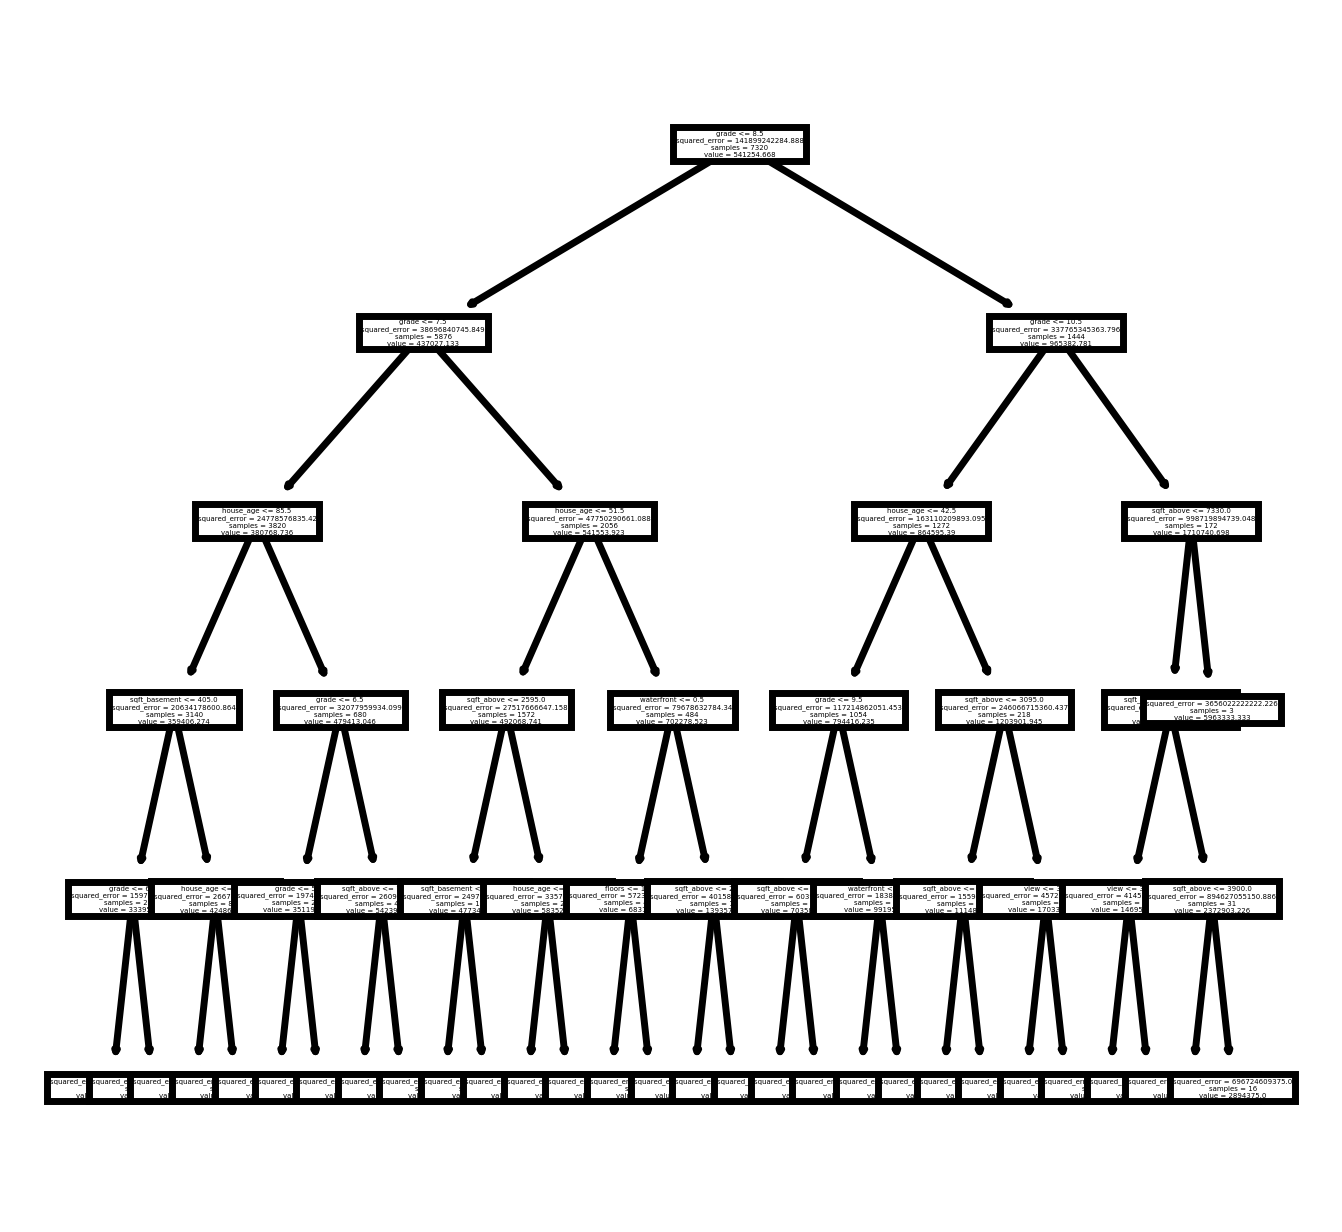

In [63]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model7.jpeg')
plt.show()

In [64]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 352793.93002257, 1816666.66666667,  502926.14527027, ...,
        955211.32608696,  352793.93002257,  695795.06302521])

In [65]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

236504.08860751413

In [66]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.847581645468985

Since this is our lowest MAPE, we want to experiment with hypertuning the parameters of this model.

In [67]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [68]:
mape

[41.295135720092496,
 35.58204868405196,
 32.74791213949039,
 30.530998238078567,
 28.847581645468985,
 28.37647005951042,
 27.673409671580522,
 27.877912511054724,
 28.347849132001716,
 28.637604933872936,
 28.843584142155425,
 29.441137709820076,
 30.06932171043602,
 30.730857010999515]

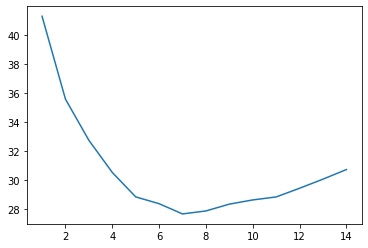

In [69]:
plt.plot(depth, np.array(mape))
plt.show()

Select  depth=7 or 8 to get  the best model without feature engineering. We chose depth=8 as it gave the lowest MAPE.

In [70]:
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)
y_pred=reg_tree.predict(X_valid)
# RMSE
rmse=np.sqrt(np.mean((y_valid - y_pred)**2))
mape=np.mean(np.abs(y_valid - y_pred)/y_valid)*100

In [71]:
rmse, mape

(237183.3200297771, 27.877912511054724)

#### SCOPE: Hypertuning the parameters has brought down  the RMSE and MAPE slightly. We will use this model on  our test data. Our intuition is that  zipcode,  as well as some other variables,  will be better predictors and will lower MAPE and RMSE. We will try to create these variables using  feature engineering methods.

### Experiment:  FEATURE ENGINEERING

We are unable to use variables like zipcode, yr_renovated in our analysis as they are categorical variables. Additionally, we wanted to run our  regression tree on the  variable "basement" which simply indicates the presence of a basement (0 vs 1).

In [72]:
#Pandas dummies for transforming zipcode variable
zipcodes = pd.get_dummies(data.zipcode,drop_first=True)
data = pd.concat([data, zipcodes], axis='columns')

In [73]:
# dummies for transforming "yr_renovated" variable
data["renovated"]=np.where(data["yr_renovated"]>0,1,0)
# dummies for transforming "sqft_basement" variable
data["basement"]=np.where(data["sqft_basement"]>0,1,0)

In [74]:
# log transform of price
log_price = np.log(data.price)
data.insert(93, 'log_price', log_price, True)

### Experiment:   MODEL FITTING AFTER FEATURE ENGINEERING 

#### Model 1:  Adding feature engineered variables to the best model we found before feature engineering  

In [75]:
X_train=data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','renovated','basement']]
y_train = data.price

In [76]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [77]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [78]:
y_pred=reg_tree.predict(X_valid)
y_pred

array([1064279.41176471,  328238.84859155,  875382.26482213, ...,
        316719.62462462,  875382.26482213,  328238.84859155])

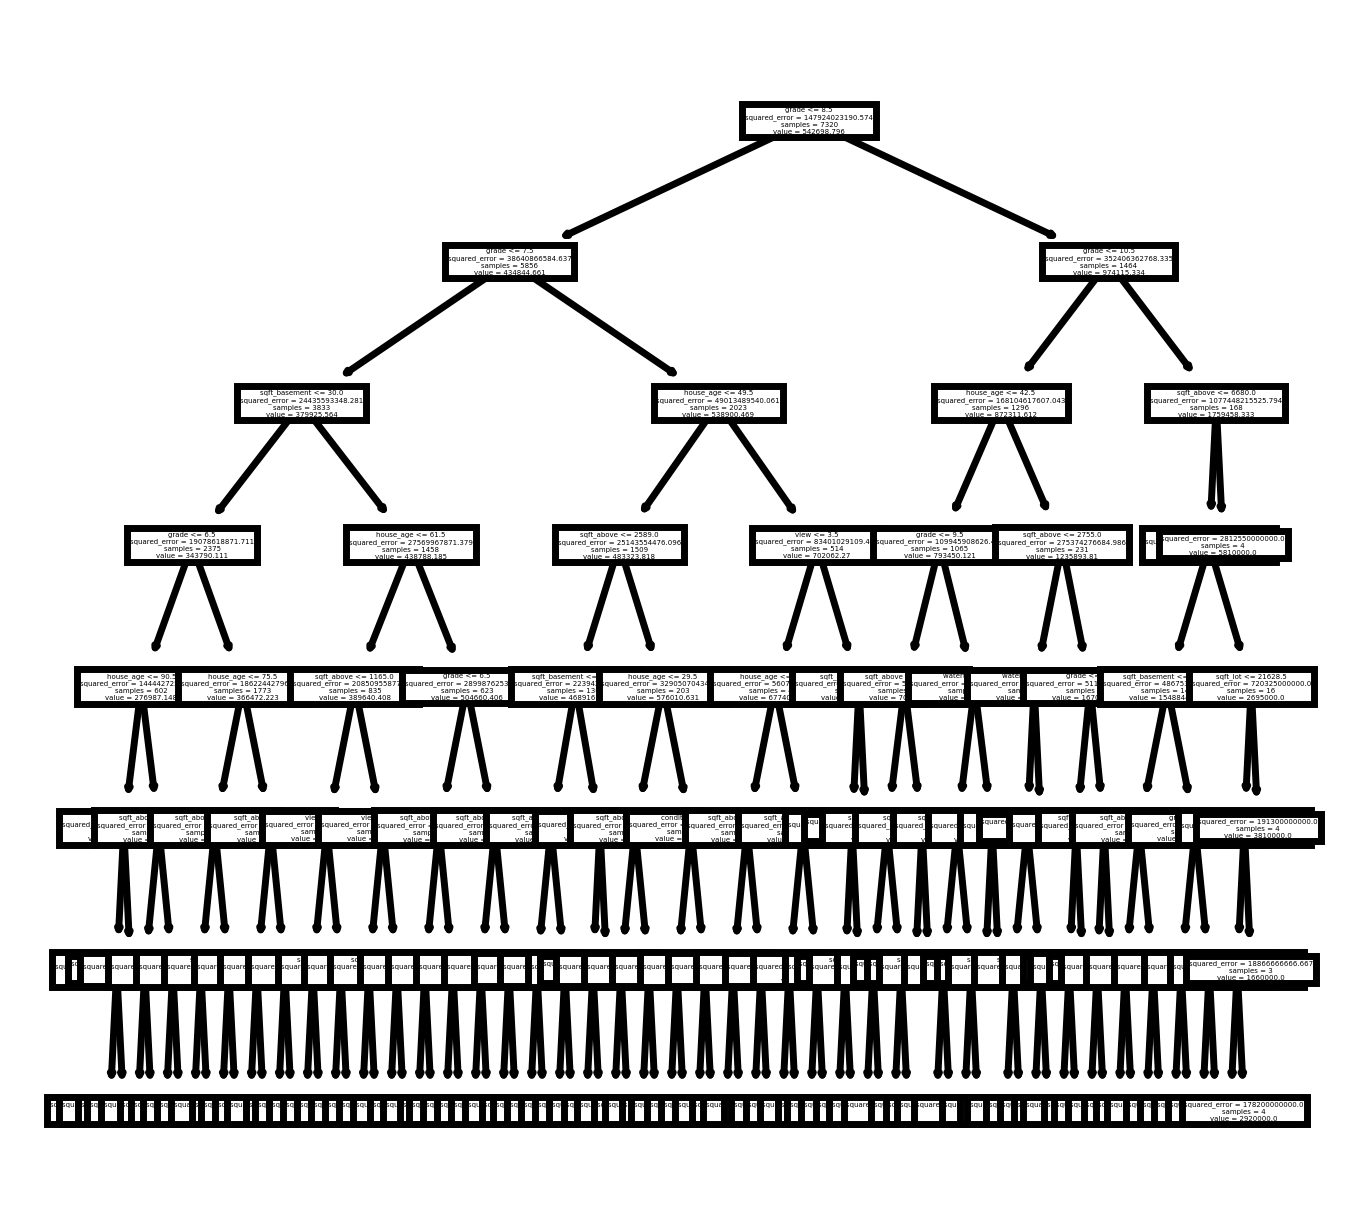

In [79]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('FEModel1.jpeg')
plt.show()

In [80]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

222456.82449298157

In [81]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

27.558552258017432

In [82]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [83]:
mape

[41.438658351296986,
 35.94292083819442,
 33.15626334131791,
 31.175681185909347,
 29.047056705961467,
 28.173064871817004,
 27.552336928751604,
 27.10845697847411,
 26.994325987189793,
 27.889761255749846,
 28.231239231654648,
 28.34310596897163,
 28.70231441719501,
 28.925276829282666]

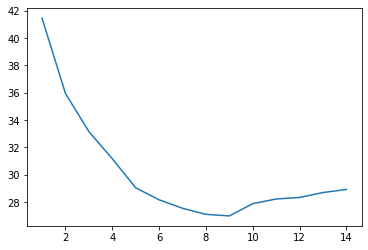

In [84]:
plt.plot(depth, np.array(mape))
plt.show()

In [85]:
#Choose k=8,9

In [86]:
leaf = np.arange(1,15)
mape = []

for i in leaf:
    reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [87]:
mape

[27.528106240574253,
 27.170532635911364,
 27.05570400186127,
 26.76163147385458,
 27.299426540098022,
 27.300055677449215,
 27.135580825135623,
 27.249688501455253,
 27.10631729844263,
 27.075399218678513,
 27.085145743377346,
 26.88151885743173,
 26.97646757434201,
 26.82194538777986]

Choose depth=9,leaf=2 where MAPE is the lowest (27.392)  , which is what we chose before hyperparameter tuning. This is the lowest  error we can get after feature engineering in this model. We will implement  this on the  test data. 

#### Model 2: Our next model includes zipcodes created with one-hot encoding. 

In [88]:
#We also tried feature engineering on zipcode, however, the MAPE was 0.86, which hinted at  an  error in our  encoding.
X_train = data.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price

In [89]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [90]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [91]:
y_pred=reg_tree.predict(X_valid)
y_pred

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([882785.8       , 264664.18947368, 645802.74561404, ...,
       498437.94244604, 264664.18947368, 287659.64189189])

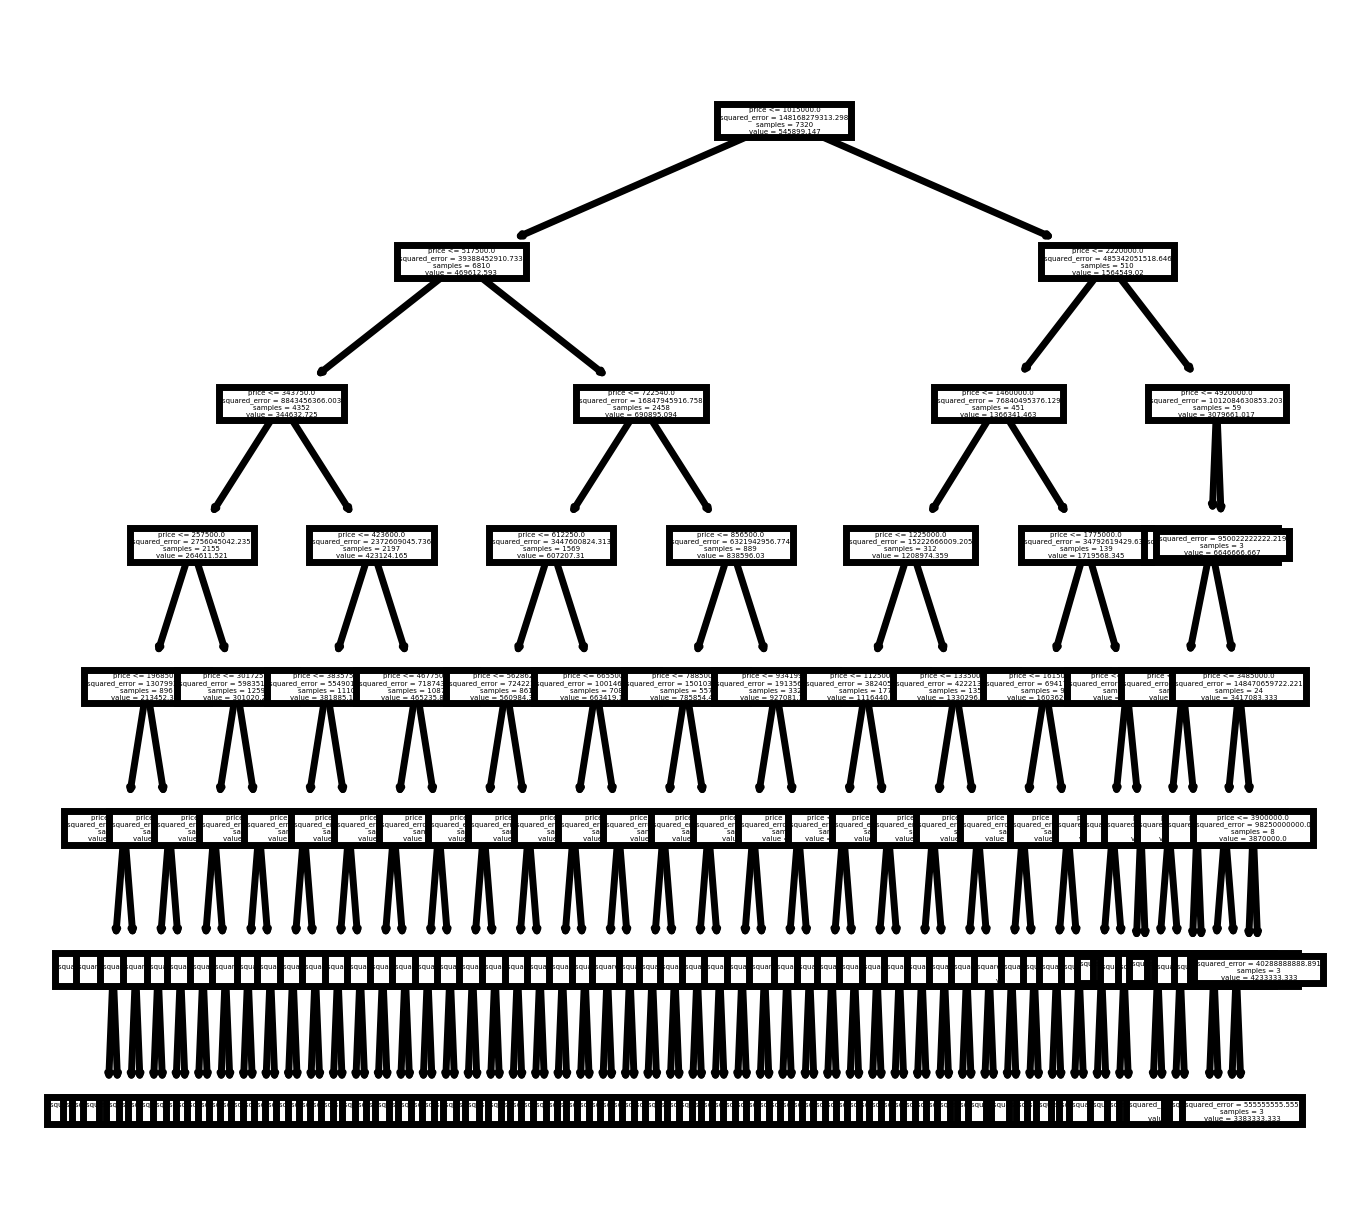

In [92]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('FEModel2.jpeg')
plt.show()

In [93]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

8359.765024398544

In [94]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

0.8928723273813423

Our first model after feature engineering and hyperparameter tuning shows that the reduction in MAPE and  RMSE is very low. There is not  much difference that feature engineering has made in this model.
Our second model post feature engineering of zipcodes shows a drastic change in  RMSE and MAPE. We are unsure of the reasons for this  drastic change. We will implement this model in our test data to see if it's replicable.

### Experiment:Final decision tree model testing  

In [95]:
test=pd.read_csv("https://raw.githubusercontent.com/H-Patell/Main/main/kc_house_test_data.csv")
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [96]:
len(test)

2217

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2217 non-null   int64  
 1   date           2217 non-null   object 
 2   price          2217 non-null   float64
 3   bedrooms       2217 non-null   int64  
 4   bathrooms      2217 non-null   float64
 5   sqft_living    2217 non-null   int64  
 6   sqft_lot       2217 non-null   int64  
 7   floors         2217 non-null   float64
 8   waterfront     2217 non-null   int64  
 9   view           2217 non-null   int64  
 10  condition      2217 non-null   int64  
 11  grade          2217 non-null   int64  
 12  sqft_above     2217 non-null   int64  
 13  sqft_basement  2217 non-null   int64  
 14  yr_built       2217 non-null   int64  
 15  yr_renovated   2217 non-null   int64  
 16  zipcode        2217 non-null   int64  
 17  lat            2217 non-null   float64
 18  long    

Since there  no anomalies with bedrooms/bathrooms=0 or any null  values, we don't need to make any  changes.

In [98]:
#creating variable "house_age" and "log_price"
house_age = 2015 - test['yr_built']
test.insert(21, 'house_age', house_age, True)

In [99]:
# log transform of price
log_price = np.log(test.price)
test.insert(22, 'log_price', log_price, True)

In [100]:
#creating dummies for "renovated","basement"
test['renovated'] = np.where(test['yr_renovated'] > 0, 1, 0)
test['basement'] = np.where(test['sqft_basement'] > 0, 1, 0)

In [101]:
#one-hot encoding for zipcodes
zipcodes = pd.get_dummies(test.zipcode, drop_first=True)
test = pd.concat([test, zipcodes], axis='columns')

In [102]:
#Running two models on test data 
X_train=data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','basement','renovated']]
y_train = data.price

In [103]:
X_test=test[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','basement','renovated']]
y_test = test.price

In [104]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [105]:
#predicting y_test in this the model
y_predt=reg_tree.predict(X_test)
y_predt

array([326704.1923436 , 570301.10989011, 448250.        , ...,
       527393.64566929, 351453.42857143, 450618.91358025])

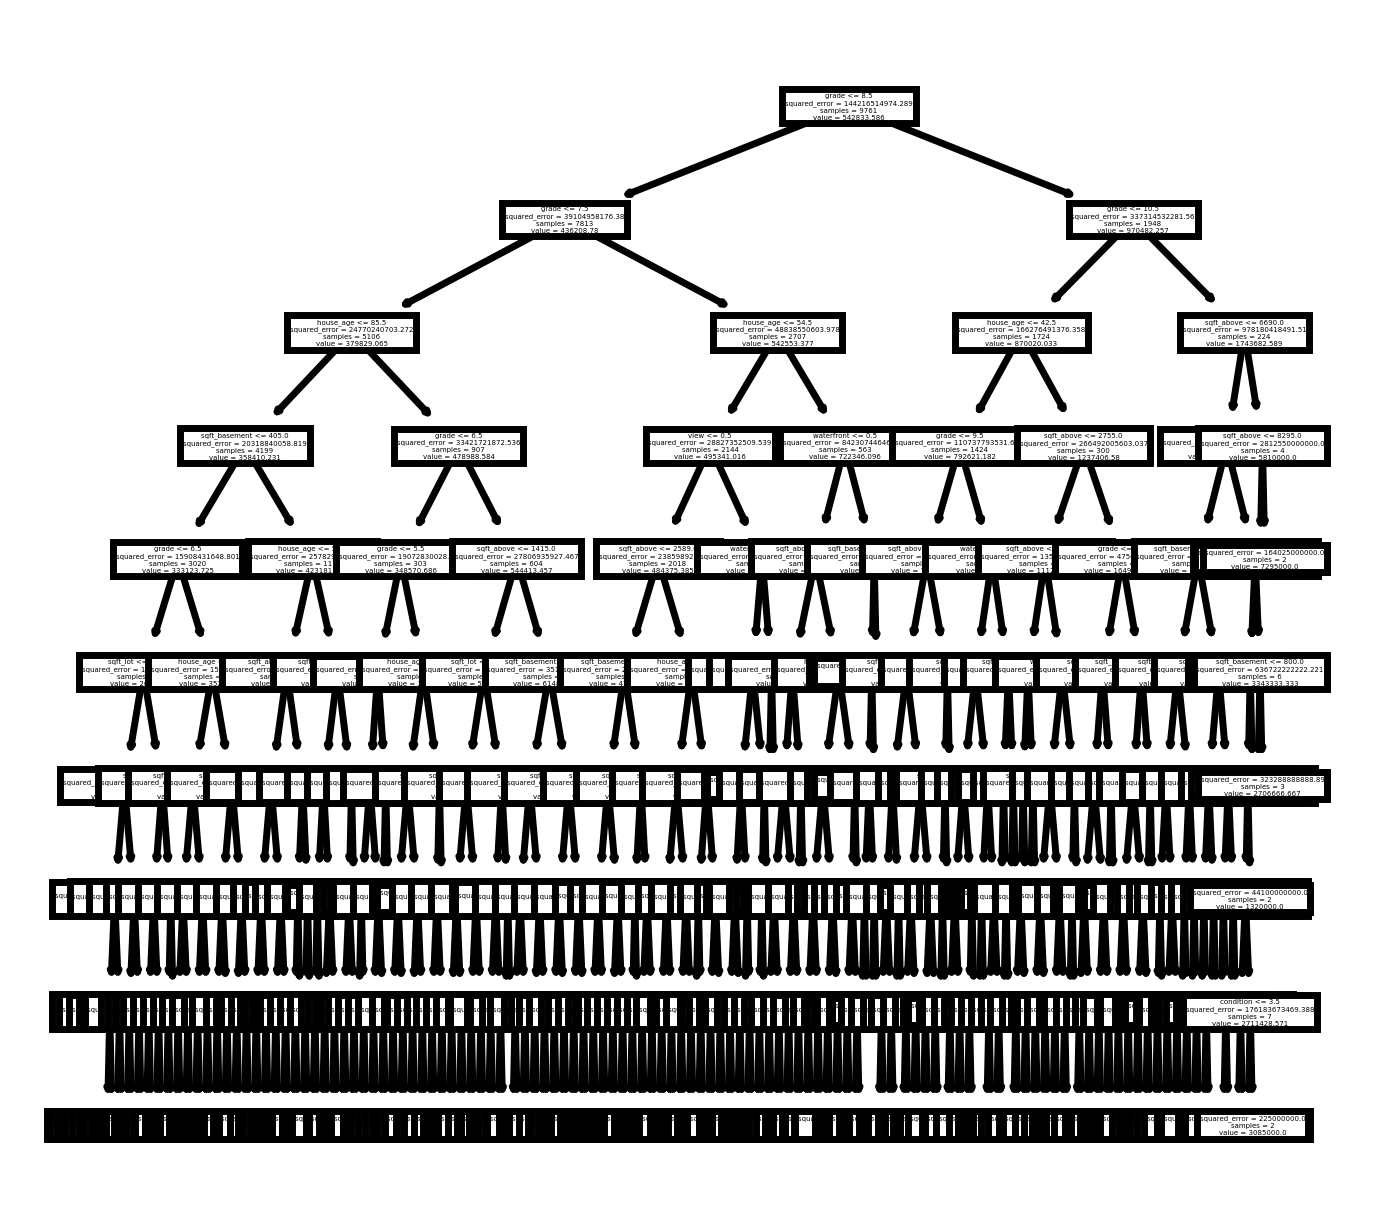

In [106]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('TestModel1.jpeg')
plt.show()

In [107]:
# RMSE
np.sqrt(np.mean((y_test - y_predt)**2))

233966.1489351535

In [108]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

28.93857322060585

#### SCOPE: Our model shows MAPE of 29.06% which means that on aaverage,  our predicted values are 29% away  from the actual values. We will also try our model with zipcode on our test data.

###  Experiment: Running Model 2 (with zipcode feature engineer variable) on  test data

In [109]:
X_train = data.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price


In [110]:
X_test = test.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_test = test.price

In [111]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [112]:
#predicting y_test in this model
y_predt=reg_tree.predict(X_test)
y_predt

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([324742.20652174, 529680.8       , 191195.77777778, ...,
       609929.65      , 229917.95522388, 414823.57142857])

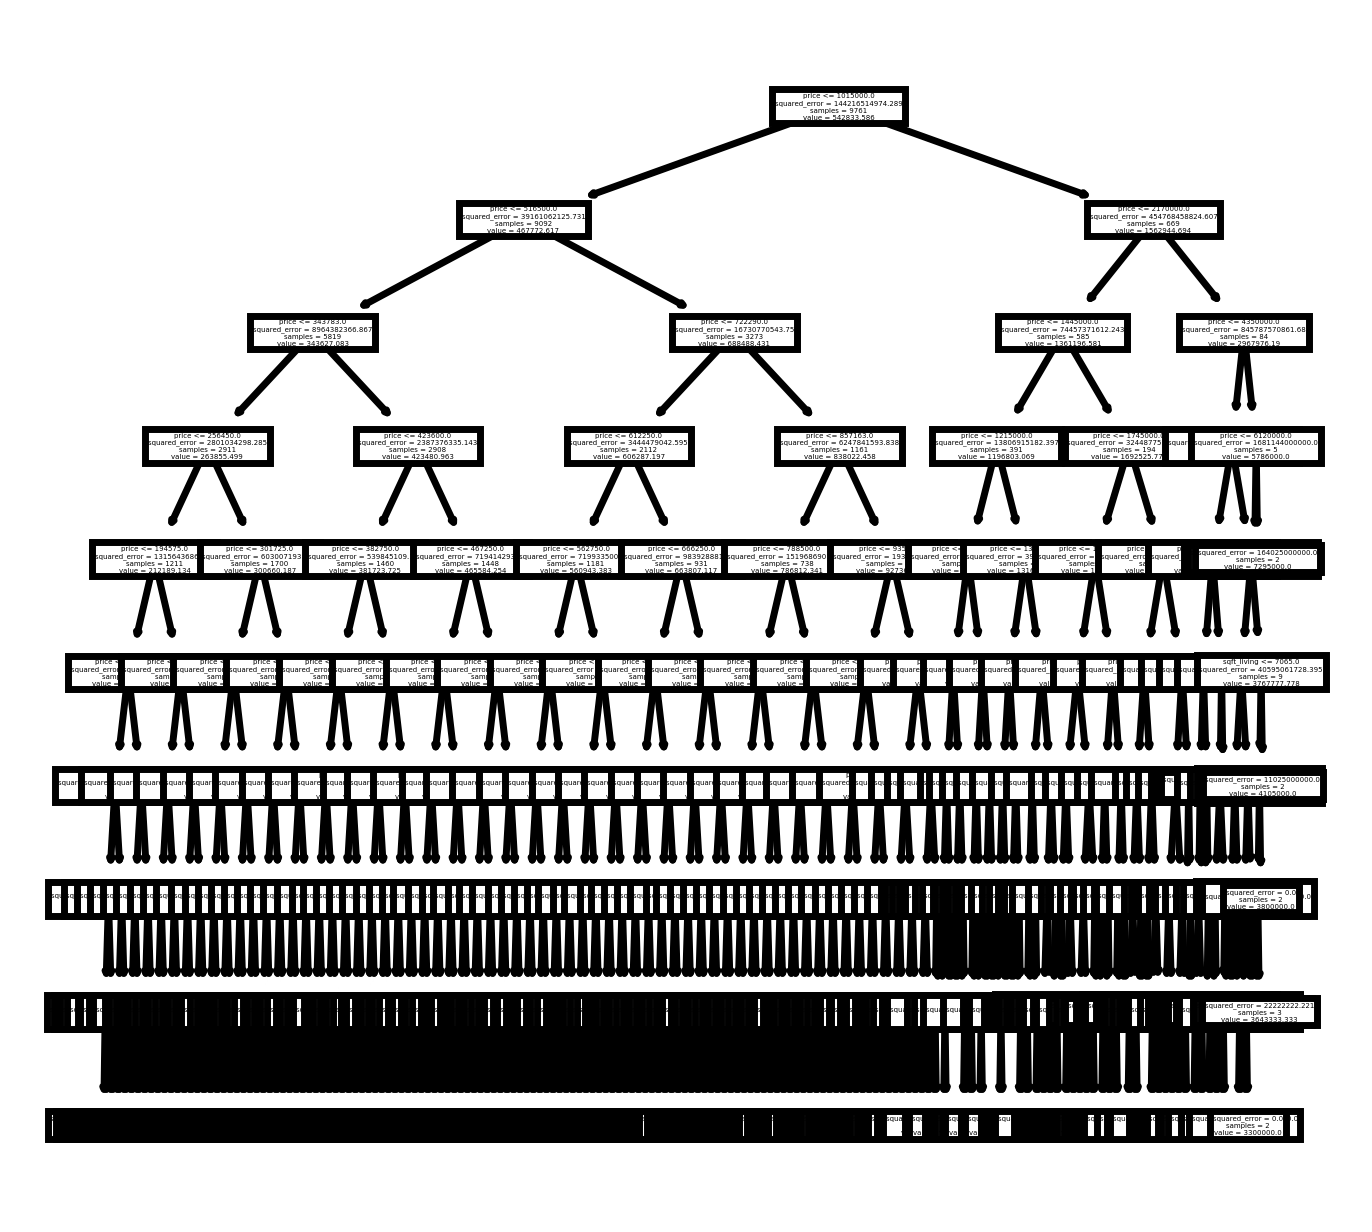

In [113]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('TestModel2.jpeg')
plt.show()

In [114]:
# RMSE (Root mean squared error)
np.sqrt(np.mean((y_test - y_predt)**2))

4864.325817870888

In [115]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

0.1656734947986459

#### SCOPE: The error  in  our model is really low, almost next to 0 percent. This is highly suspicious, however, it is worth exploring as to why we are getting such a low MAPE.

### 2. Linear regression model

In [116]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [117]:
data = pd.read_csv(r'https://raw.githubusercontent.com/H-Patell/Main/main/kc_house_train_data.csv')
data.head(3)          

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000,2,1.0,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   object 
 1   date           9761 non-null   object 
 2   price          9761 non-null   int64  
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

#### Data pre-processing

In [119]:
data[data.bedrooms == 33]                                  #updating bedroom values for outliers/anomalies with average bedrooms
data.loc[[7204],'bedrooms'] = 3        #updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data[data['bedrooms']==0]
data.loc[[8840,8338,2228,3177,4472,4507],'bedrooms'] = 3
data.loc[[8840,3177,4472,4507],'bathrooms'] = 2
data.loc[[8338,2228],'bedrooms']=2         #updating to 2 rooms as the avg bedrooms of houses with 1 and 0.75 bathrooms are 2.63 and 2.02 respectively


In [120]:
# Creating "house_age" variable 
house_age = 2015 - data['yr_built']
data.insert(21, 'house_age', house_age, True)

In [121]:
# dummies for transforming "yr_renovated", "sqft_basement" variables
data["yr_renovated"]=np.where(data["yr_renovated"]>0,1,0)
data["sqft_basement"]=np.where(data["sqft_basement"]>0,1,0)

In [122]:
# Log transformations

data.price = np.log(data.price)                        #
data.sqft_living = np.log(data.sqft_living)
data.sqft_lot = np.log(data.sqft_lot)
data.sqft_above = np.log(data.sqft_above)
data.sqft_living15 = np.log(data.sqft_living15)
data.sqft_lot15 = np.log(data.sqft_lot15)

#### Features and response 

In [123]:
x = data.drop(['price', 'id', 'date'], axis=1)
y = data.price


#### Linear assumptions(proper vaidation checks)

1. Linearity between independent and dependent variables

There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

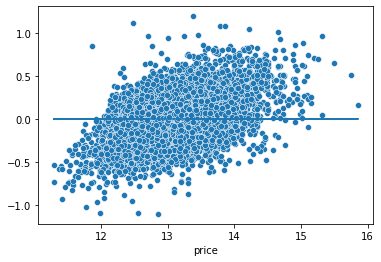

In [124]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
residuals = result.resid
sns.scatterplot(y=residuals , x=y)
plt.plot(y, [0]*len(y))
plt.show()                           

2. No Autocorrelation in residuals

There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

In [125]:
#Null hypothesis (H0): Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
#Alternative hypothesis (Ha): Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)

In [126]:
from statsmodels.formula.api import ols

X = sm.add_constant(x)
# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1901.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:42:01   Log-Likelihood:                -332.38
No. Observations:                9761   AIC:                             702.8
Df Residuals:                    9742   BIC:                             839.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.146e-06   2.74e-06     -0.418      0.676   -6.52e-06    4.23e-06
bedrooms         -0.0213      0.004     -5.599      0.000      -0.029      -0.014
bathrooms         0.0617      0.006     10.362      0.000       0.050       0.073
sqft_living       0.1668      0.027      6.243      0.000       0.114       0.219
sqft_lot          0.0150      0.007      2.011      0.044       0.000       0.030
floors            0.0522      0.007      7.084      0.000       0.038       0.067
waterfront        0.4249      0.031     13.911      0.000       0.365       0.485
view              0.0635      0.004     16.628      0.000       0.056       0.071
condition         0.0572      0.004     13.065      0.000       0.049       0.066
grade             0.1688      0.004     43.754      0.000       0.161       0.176
sqft_above        0.1794      0.026      6.814      0.000       0.128       0.231
sqft_basement     0.0832      0.011      7.457      0.000       0.061       0.105
yr_built         -0.0031      0.003     -1.131      0.258      -0.008       0.002
yr_renovated      0.0443      0.013      3.310      0.001       0.018       0.071
zipcode          -0.0006   6.17e-05    -10.020      0.000      -0.001      -0.000
lat               1.3493      0.020     68.154      0.000       1.310       1.388
long             -0.0817      0.025     -3.302      0.001      -0.130      -0.033
sqft_living15     0.2008      0.013     15.252      0.000       0.175       0.227
sqft_lot15       -0.0398      0.008     -4.906      0.000      -0.056      -0.024
house_age         0.0008      0.003      0.284      0.776      -0.005       0.006
==============================================================================
Omnibus:                      154.588   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.681
Skew:                           0.149   Prob(JB):                     9.99e-55
Kurtosis:                       3.723   Cond. No.                     8.24e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Durbin-Watson test statistics (d) always ranges between 0 and 4. If the value is near 2, it indicates evidence of non-autocorrelation. If the value is towards 0, it indicates evidence of positive autocorrelation. If the value is towards 4, it indicates evidence of negative autocorrelation

In [127]:
#from statsmodels.stats.stattools import durbin_watson

#durbin_watson(reg.resid)

3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.

The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.

For calculating the VIF, we will do a linear regression process for each variable, where that variable will become a target variable. After we do that process, we calculate the R square from it. And finally, we calculate the VIF value with this formula (1/1-R^2).

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.iloc[:,:].values, i) for i in range(x.iloc[:, :].shape[1])]
vif["features"] = x.iloc[:, :].columns
vif.round(1)        # vif more than 5or10 is not important means high  multicollinearity

,VIF Factor,features
0,1.9,bedrooms
1,3.3,bathrooms
2,20.4,sqft_living
3,6.9,sqft_lot
4,2.4,floors
5,1.2,waterfront
6,1.4,view
7,1.3,condition
8,3.2,grade
9,19.9,sqft_above


4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

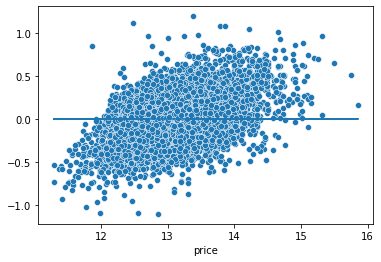

In [129]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
residuals = result.resid
sns.scatterplot(y=residuals , x=y)
plt.plot(y, [0]*len(y))
plt.show()  

You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern 
where residuals are nothing but the difference between actual and fitted values(residuals = y_test-y_pred)

5.Errors are normally distributed

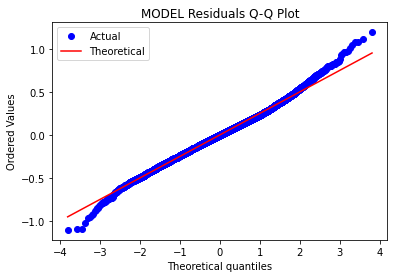

In [130]:
from scipy import stats

stats.probplot(result.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

#### predictors and target variables

In [131]:
x = x.drop(['sqft_living', 'sqft_above','yr_built', 'house_age'], axis=1)    #Drop variables with higher VIF
y = data.price

In [132]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Fitting linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [133]:
reg.score(x_train, y_train)

0.7456526817315853

In [134]:
# Prediction on test 
pred = reg.predict(x_test)
pred

array([13.42074756, 13.57906947, 13.93248051, ..., 12.44740569,
       12.83295798, 13.54109114])

In [135]:
# Reverse transformation
y_pred = np.exp(pred)
y_test = np.exp(y_test)
y_pred, y_test

(array([ 673839.72299621,  789432.38461763, 1124085.6577823 , ...,
         254588.98303464,  374354.30847371,  760013.24734127]),
 1826     450000.0
 444      851000.0
 3767    2190000.0
 1515     193000.0
 2635     216500.0
           ...    
 9457     533112.0
 5948     350000.0
 1956     199500.0
 1277     401000.0
 7415     495000.0
 Name: price, Length: 2441, dtype: float64)

#### Model evaluation 

In [136]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - y_pred))

113914.70579626507

In [137]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

21.202617787954697

In [138]:
# R-Square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7015354828314485

In [139]:
# Adjusted R-Square
adj_r2 = 1 - ((1 - r2) * (len(x) - 1) / (len(x) - len(x.columns) - 1))
adj_r2

0.7010760710554067

#### Final Linear reg. model testing on test-set

In [140]:
test = pd.read_csv(r'https://raw.githubusercontent.com/H-Patell/Main/main/kc_house_test_data.csv')

#### Data-preprocessing

In [141]:
#creating dummies for "renovated","basement"
test['yr_renovated'] = np.where(test['yr_renovated'] > 0, 1, 0)
test['yr_basement'] = np.where(test['sqft_basement'] > 0, 1, 0)

In [142]:
#creating variable "house_age" and "log_price"
house_age = 2015 - test['yr_built']
test.insert(21, 'house_age', house_age, True)

# log transform of price
test.price = np.log(test.price)  

#### Features and response variables

In [143]:
X = test.drop(['id','date','sqft_living', 'sqft_above','yr_built', 'house_age'], axis=1) # Drop higher VIF variables
Y = test.price

#### Fitting data in model

In [144]:
# Train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
# Model fitting
reg = LinearRegression()
reg.fit(X_train, Y_train)
# prediciton on test split
t_pred = reg.predict(X_test)
t_pred

array([13.42246797, 13.99783211, 12.9360338 , 12.39669301, 12.40901349,
       13.01689174, 12.82125828, 12.71289025, 12.9692122 , 13.65416741,
       13.33747476, 12.0722555 , 13.26386294, 13.46878594, 12.70684793,
       13.71015004, 13.99783211, 14.29793671, 12.58792789, 13.04979268,
       13.21767356, 13.34870182, 12.25486281, 12.9360338 , 13.80444961,
       13.19932442, 13.28787782, 12.86099861, 13.81551056, 12.01370075,
       13.30468493, 13.59735455, 12.91902245, 12.94800999, 12.87774079,
       13.58986388, 12.76568843, 13.21767356, 13.04979268, 12.53537639,
       13.64109765, 13.9552725 , 13.13429195, 13.12236338, 14.45208739,
       12.61917518, 13.07212216, 12.37158708, 13.3770056 , 13.0280527 ,
       12.8346813 , 13.30468493, 12.93256998, 13.12236338, 12.54966235,
       12.64093473, 12.82395734, 13.73754902, 13.36687695, 13.31298374,
       13.0280527 , 12.82125828, 12.84792653, 12.34147728, 13.92883924,
       12.49874226, 13.31957355, 14.22762021, 12.54254488, 13.48

In [145]:
# Reverse transformation
Y_pred = np.exp(t_pred)
Y_test = np.exp(Y_test)
Y_pred, Y_test

(array([ 675000.00000001, 1200000.        ,  415000.        ,
         242000.        ,  244999.99999999,  449949.99999999,
         369999.99999999,  332000.        ,  429000.        ,
         851000.00000002,  620000.00000001,  174950.        ,
         576000.        ,  707000.00000002,  330000.00000001,
         900000.00000002, 1200000.        , 1620000.        ,
         292999.99999999,  465000.        ,  550000.        ,
         627000.00000001,  210000.        ,  415000.        ,
         988999.99999999,  539999.99999999,  590000.00000001,
         385000.        , 1000000.00000002,  165000.        ,
         600000.        ,  804000.        ,  407999.99999999,
         419999.99999999,  391500.        ,  797999.99999999,
         350000.        ,  550000.00000001,  465000.        ,
         278000.        ,  839950.        , 1149999.99999998,
         505999.99999999,  500000.        , 1890000.00000003,
         302300.00000001,  475499.99999999,  236000.        ,
        

#### model evaluation

In [146]:
# MAE (Mean Absolute Error)
np.mean(np.abs(Y_test - Y_pred))

6.7503581679350625e-09

In [147]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(Y_test - Y_pred)/Y_test)*100

1.2934136701342459e-12

In [148]:
# R-Square
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
r2

1.0

In [149]:
# Adjusted R-Square
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - len(X.columns) - 1))
adj_r2

1.0

### 3.Random forest regressor

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [151]:
data = pd.read_csv(r'https://raw.githubusercontent.com/H-Patell/Main/main/kc_house_train_data.csv', parse_dates=True)
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000,2,1.0,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   object 
 1   date           9761 non-null   object 
 2   price          9761 non-null   int64  
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

#### Data preprocessing

In [153]:
data[data.bedrooms == 33]                                  #updating bedroom values for outliers/anomalies with average bedrooms
data.loc[[7204],'bedrooms'] = 3        #updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data[data['bedrooms']==0]
data.loc[[8840,8338,2228,3177,4472,4507],'bedrooms'] = 3
data.loc[[8840,3177,4472,4507],'bathrooms'] = 2
data.loc[[8338,2228],'bedrooms']=2         #updating to 2 rooms as the avg bedrooms of houses with 1 and 0.75 bathrooms are 2.63 and 2.02 respectively

In [154]:
# Creating "house_age" variable 
house_age = 2015 - data['yr_built']
data.insert(21, 'house_age', house_age, True)

# dummies for transforming "yr_renovated", "sqft_basement" variables
data["yr_renovated"]=np.where(data["yr_renovated"]>0,1,0)
data["sqft_basement"]=np.where(data["sqft_basement"]>0,1,0)

#Log transformations
data.price = np.log(data.price)                        #
data.sqft_living = np.log(data.sqft_living)
data.sqft_lot = np.log(data.sqft_lot)
data.sqft_above = np.log(data.sqft_above)
data.sqft_living15 = np.log(data.sqft_living15)
data.sqft_lot15 = np.log(data.sqft_lot15)

#### Variables

In [155]:
x = data.drop(['id','date'], axis=1)
y = data.price

In [156]:
## splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(y_train.shape, y_test.shape)

(7320,) (2441,)


In [157]:
# scaling the features in order to avoid bias of features

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [158]:
x_train

array([[-0.80498463, -1.52723924, -1.45183481, ..., -0.24944999,
        -0.19824337,  1.68140192],
       [-0.24584192, -1.52723924, -0.15655698, ..., -0.35100446,
        -0.24209581, -0.20431925],
       [-0.31523433, -0.41773237, -0.48037644, ..., -0.74271454,
        -0.20773524, -0.03289005],
       ...,
       [-0.31603501, -0.41773237,  0.49108194, ...,  0.14226009,
        -0.33014239, -0.95860771],
       [ 0.71497611,  0.6917745 , -1.45183481, ..., -0.06084884,
        -0.34525344,  1.54425856],
       [-0.43266764,  0.6917745 , -0.48037644, ..., -0.45255892,
        -0.19672467,  0.51568338]])

#### Fitting data into the model

In [159]:
forest = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
rf_pred = forest.predict(x_test)
#y_pred = np.exp(rf_pred)
#y_pred
rf_pred

array([553548.75, 957577.9 , 242018.  , ..., 350000.  , 429997.6 ,
       774950.  ])

In [160]:
#y_test = np.exp(y_test)

In [161]:
forest.feature_importances_

array([9.83617003e-01, 3.91941621e-04, 1.88988506e-03, 4.05805122e-03,
       1.63282761e-04, 1.64921819e-04, 8.81508603e-06, 1.28855070e-04,
       7.65241926e-05, 6.39523650e-04, 7.60736501e-03, 6.57399498e-06,
       6.48051258e-05, 1.23162353e-04, 5.71455105e-05, 1.01246543e-04,
       1.29946905e-04, 3.52014455e-04, 2.13389877e-04, 2.05546586e-04])

#### Model  evaluation

In [162]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test -rf_pred))

621.8695083981974

In [163]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - rf_pred)/y_test)*100

0.04096488396937931

In [164]:
# R-Square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_pred)
r2

0.9996810885517964

In [165]:
# Adjusted R-Square
adj_r2 = 1 - ((1 - r2) * (len(x) - 1) / (len(x) - len(x.columns) - 1))
adj_r2

0.9996804337028268

#### Final model testing

In [166]:
test = pd.read_csv(r'https://raw.githubusercontent.com/H-Patell/Main/main/kc_house_test_data.csv')

In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2217 non-null   int64  
 1   date           2217 non-null   object 
 2   price          2217 non-null   float64
 3   bedrooms       2217 non-null   int64  
 4   bathrooms      2217 non-null   float64
 5   sqft_living    2217 non-null   int64  
 6   sqft_lot       2217 non-null   int64  
 7   floors         2217 non-null   float64
 8   waterfront     2217 non-null   int64  
 9   view           2217 non-null   int64  
 10  condition      2217 non-null   int64  
 11  grade          2217 non-null   int64  
 12  sqft_above     2217 non-null   int64  
 13  sqft_basement  2217 non-null   int64  
 14  yr_built       2217 non-null   int64  
 15  yr_renovated   2217 non-null   int64  
 16  zipcode        2217 non-null   int64  
 17  lat            2217 non-null   float64
 18  long    

In [168]:
#creating dummies for "renovated","basement"
test['yr_renovated'] = np.where(test['yr_renovated'] > 0, 1, 0)
test['yr_basement'] = np.where(test['sqft_basement'] > 0, 1, 0)

#creating variable "house_age" and "log_price"
house_age = 2015 - test['yr_built']
test.insert(21, 'house_age', house_age, True)

# log transform of price
#test.price = np.log(test.price)  

In [169]:
x = test.drop(['id', 'date','price'], axis=1)
y = test.price

In [170]:
## splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(y_train.shape, y_test.shape)

(1662,) (555,)


In [171]:
# scaling the features in order to avoid bias of features

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [172]:
# Fitting model
forest = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
# prediction on test split
rf_pred = forest.predict(x_test)
#y_p red = np.exp(rf_pred) 
#y_pred
rf_pred

array([ 366631.7 ,  312275.12, 1130884.15,  449717.18,  647182.16,
        784458.29,  327063.84,  467428.58,  672261.  ,  285596.25,
       1954100.  ,  631597.5 ,  573124.26,  350578.24,  306787.92,
        316224.82,  514857.5 ,  652720.  , 1042694.  ,  671009.35,
        287738.43,  502919.5 ,  941061.97,  346636.82,  333032.08,
        539109.5 ,  991805.72,  507747.06,  369430.44,  317731.44,
        680844.65,  218202.62,  792169.  ,  645616.04,  327795.37,
        666941.71,  428940.05,  522405.45,  406436.16,  332944.29,
        391128.  ,  814369.51,  276479.5 ,  381555.34,  315170.  ,
        518532.  ,  433627.08,  456545.92,  437159.4 ,  386749.82,
        777246.88,  439839.12,  717218.43,  534618.52,  504793.64,
        419688.16,  311170.2 ,  682704.65,  418893.5 ,  527457.  ,
        311391.4 ,  639655.19,  247759.9 ,  279004.5 ,  457918.3 ,
       1035696.71,  578433.01,  282510.8 ,  643147.38,  221336.  ,
       1851960.  ,  488824.28, 1197325.27,  264352.56,  881328

In [173]:
# Reverse transformation
#y_test = np.exp(y_test)

####  Important features

In [174]:
forest.feature_importances_

array([0.00296078, 0.0149632 , 0.51827814, 0.01301282, 0.00444197,
       0.00376617, 0.01461084, 0.00647917, 0.04786869, 0.04345023,
       0.00774987, 0.01538747, 0.0009855 , 0.02117456, 0.15971089,
       0.0607304 , 0.03489642, 0.01218445, 0.01659582, 0.0007526 ])

#### Final model evaluation 

In [175]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - rf_pred))

82434.53976576576

In [176]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - rf_pred)/y_test)*100

15.909101666410585

In [177]:
# R-Square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_pred)
r2

0.8476731116187208

In [178]:
# Adjusted R-Square
adj_r2 = 1 - ((1 - r2) * (len(x) - 1) / (len(x) - len(x.columns) - 1))
adj_r2

0.8462857993383813